In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import wasserstein_distance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

import BABE as BABE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.datasets import BinaryLabelDataset

import warnings
warnings.filterwarnings("ignore")

In [3]:
### STEP1 Generate data from normal distribution with varying means for G=0
seed=35
names = ['E_d', 'G', 'Z_d']
Eval=100
Zval=100
Gval=2
rounddigit =4
d=3
means0 = np.round(np.linspace(40,80, 5))

all_dfs={}

for m0 in means0:

    n=300000
    p=0.5
    bias0=-0.2
    bias1=0.2
    mean0=m0
    mean1 = 60
    sd0 = 30
    sd1 = 30

    threshold =60
    dfs=[]
    for i in range(1):

        source, estimate,_= BABE.generate_data(n, p, bias0, bias1, mean0, mean1, sd0, sd1,threshold, seed)
        dfs.append((source, estimate))
    
    all_dfs[m0]= dfs
    
    

##### Running Experiments BaBE and DI

In [484]:
results={}
preprocessed_dfs = {}
distributions={}

for key,datalist in all_dfs.items(): #list(all_dfs.items())[0:1]
    print('The mean for Group 0',key)
    results[key] = {}
    distributions[key]={}
    
    ### Y

    ACCEZ = []
    ACCEZ0 = []
    ACCEZ1 = []
    WEZ=[]

    ACCY = []
    ACCY0 = []
    ACCY1 = []

    SPY=[]
    SP1Y=[]
    SP0Y=[]
    EODY=[]
    EO1Y=[]
    EO0Y=[]

    CSP1Y = []
    CSP11Y = []
    CSP01Y = []
    CSP2Y = []
    CSP12Y = []
    CSP02Y = []
#     CSP3Y = []

    MEY=[]
    MEY0=[]
    MEY1=[]

    WdistZ = []
    WdistZ0 = []
    WdistZ1 = []


    ###IBU

    WdistIBU = []
    WdistIBU0 = []
    WdistIBU1 = []
    IbuPriors = []


    AccEIBU = []
    AccEIBU0 = []
    AccEIBU1 = []

    MEIBU=[]
    MEIBU0=[]
    MEIBU1=[]

    AccYIBU = []
    AccYIBU0 = []
    AccYIBU1 = []

    SPIBU=[]
    SP1IBU=[]
    SP0IBU=[]
    EODIBU=[]
    EO1IBU=[]
    EO0IBU=[]

    CSP1IBU = []
    CSP01IBU = []
    CSP11IBU = []
    CSP2IBU = []
    CSP12IBU = []
    CSP02IBU = []
#     CSP3IBU = []

    ###DI Alfa 08

    AccEDI08= []
    AccEDI080 = []
    AccEDI081 = []

    AccYDI08 = []
    AccYDI080 = []
    AccYDI081 = []

    MEDI08=[]
    MEDI080=[]
    MEDI081=[]

    SPDI08=[]
    SP1DI08=[]
    SP0DI08=[]
    EODDI08=[]
    EO1DI08=[]
    EO0DI08=[]

    CSP1DI08 = []
    CSP11DI08 = []
    CSP01DI08 = []
    CSP2DI08 = []
    CSP12DI08 = []
    CSP02DI08 = []


    WdistDI08 = []
    WdistDI080 = []
    WdistDI081 = []
    
    CSPEY = []
    CSPE0Y = []
    CSPE1Y = []


    CSPEIBU = []
    CSPE0IBU = []
    CSPE1IBU = []


    CSPEDI08 = []
    CSPE0DI08 = []
    CSPE1DI08 = []



    for i,data in enumerate(datalist):
      
        df_source, estimate = data
    
        
        for i in range(10):
            print('Sample: ', i)
            df_est, df_test =np.split(estimate.sample(frac=1), [int(.80*len(estimate))])
            
             
            all_e = df_test.E_d.unique()
            ALL_E = {}
            for e in all_e:
                pe = df_test[df_test.E_d==e].shape[0]/df_test.shape[0]
                ALL_E[e]=pe

            #YZ metrics
            #CSPE over all e
            G0=0
            G1=0
            for e, pe in ALL_E.items():
                g0 = df_test.loc[(df_test.E_d==e)&(df_test.G==0)&(df_test.YZ==1)].shape[0]/df_test.loc[(df_test.E_d==e)&(df_test.G==0)].shape[0]
                G0 += g0*pe
                g1 = df_test.loc[(df_test.E_d==e)&(df_test.G==1)&(df_test.YZ==1)].shape[0]/df_test.loc[(df_test.E_d==e)&(df_test.G==1)].shape[0]
                G1 += g1*pe

    
            CSPE0Y.append(G0)
            CSPE1Y.append(G1)
            CSPEY.append(G1-G0)

            #YZ metrics

            ACCEZ.append(accuracy_score(df_test.E_d, df_test.Z_d))
            ACCEZ0.append(accuracy_score(df_test.loc[df_test.G==0].E_d, df_test.loc[df_test.G==0].Z_d))
            ACCEZ1.append(accuracy_score(df_test.loc[df_test.G==1].E_d, df_test.loc[df_test.G==1].Z_d))
            WEZ.append(wasserstein_distance(list(df_test.E_d),list(df_test.Z_d)))

            ACCY.append(accuracy_score(df_test.YE, df_test.YZ))
            ACCY0.append(accuracy_score(df_test.loc[df_test.G==0].YE, df_test.loc[df_test.G==0].YZ))
            ACCY1.append(accuracy_score(df_test.loc[df_test.G==1].YE, df_test.loc[df_test.G==1].YZ))



            #Manhattan Distance (Distortion)

            MEY.append(BABE.manhattan_dist(list(df_test.Z_d),list(df_test.E_d)))
            MEY0.append(BABE.manhattan_dist(list(df_test[df_test.G==0].Z_d),list(df_test[df_test.G==0].E_d)))
            MEY1.append(BABE.manhattan_dist(list(df_test[df_test.G==1].Z_d),list(df_test[df_test.G==1].E_d)))

            #SP
            G0=df_test[(df_test.G==0)&(df_test.YZ==1)].shape[0]/df_test[(df_test.G==0)].shape[0]
            SP0Y.append(G0)
            G1 = df_test[(df_test.G==1)&(df_test.YZ==1)].shape[0]/df_test[(df_test.G==1)].shape[0]
            SP1Y.append(G1)
            SPY.append(G1-G0)
            

            #EOD

            G0=df_test[(df_test.G==0)&(df_test.YE==1)&(df_test.YZ==1)].shape[0]/df_test[(df_test.G==0)&(df_test.YE==1)].shape[0]
            EO0Y.append(G0)
            G1 = df_test[(df_test.G==1)&(df_test.YE==1)&(df_test.YZ==1)].shape[0]/df_test[(df_test.G==1)&(df_test.YE==1)].shape[0]
            EO1Y.append(G1)
            EODY.append(G1-G0)

            #CSP1 Threshold-5
            #Positive decision for e>threshold
            G0 = df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==0)&(df_test.YZ==1)].shape[0]/df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==0)].shape[0]
            CSP01Y.append(G0)
            G1 = df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==1)&(df_test.YZ==1)].shape[0]/df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==1)].shape[0]
            CSP11Y.append(G1)
            CSP1Y.append(G1-G0)

            #CSP2 Threshold+5
            G0 = df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==0)&(df_test.YZ==1)].shape[0]/df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==0)].shape[0]
            CSP02Y.append(G0)
            G1 = df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==1)&(df_test.YZ==1)].shape[0]/df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==1)].shape[0]
            CSP12Y.append(G1)
            CSP2Y.append(G1-G0)


            #Compute W between distributions for Z
            #compute true EG
            EG_true = pd.crosstab(df_test.G, df_test.E_d,  normalize= 'index')
            E_dist = list(EG_true.values[0])+list(EG_true.values[1])
            #compute Z|G
            matZ= pd.crosstab(df_test.G,df_test.Z_d, normalize= 'index')
            Z_dist = list(matZ.values[0])+list(matZ.values[1]) #ditribution of Z given G

            WdistZ.append( wasserstein_distance(Z_dist, E_dist))
            WdistZ0.append(wasserstein_distance(matZ.values[0],EG_true.values[0]))
            WdistZ1.append(wasserstein_distance(matZ.values[1],EG_true.values[1]))

             #####

            #BABE learning

            Z_EG = BABE.Z_given_EG(df_source,names,Eval, Gval, Zval)#from source data
            Z_G = BABE.Z_given_G(df_est, names, Gval, Zval)# from the estimation set
            P_G = BABE.Prob(df_est, 'G', Gval)# from the estimation set
            E_G_Uniform = BABE.E_given_G_Uniform(Eval, Gval)

            E_G_IBU = BABE.get_priors(E_G_Uniform, Z_G ,Z_EG,P_G, Eval, Gval, Zval,rounddigit)
            IbuPriors.append(E_G_IBU)
            WdistIBU.append(wasserstein_distance(E_dist,list(E_G_IBU.values())))
            WdistIBU0.append(wasserstein_distance(EG_true.values[0],list(E_G_IBU.values())[0:100]))
            WdistIBU1.append(wasserstein_distance(EG_true.values[1],list(E_G_IBU.values())[100:200]))


            #BABE Inference

            _, E_values=BABE.inferE(df_test, names, E_G_IBU, Z_G, Z_EG, Eval, d)# test set


            #BABE metrics

            df_test['EIBU'] = E_values
            df_test['YIBU'] = [1 if x>threshold else 0 for x in df_test['EIBU']]

            AccEIBU.append(accuracy_score(df_test.EIBU,df_test.E_d))
            AccEIBU0.append(accuracy_score(df_test[df_test.G==0].EIBU,df_test[df_test.G==0].E_d))
            AccEIBU1.append(accuracy_score(df_test[df_test.G==1].EIBU,df_test[df_test.G==1].E_d))

            #Manhattan Distance (Distortion)

            MEIBU.append(BABE.manhattan_dist(list(df_test.EIBU),list(df_test.E_d)))
            MEIBU0.append(BABE.manhattan_dist(list(df_test[df_test.G==0].EIBU),list(df_test[df_test.G==0].E_d)))
            MEIBU1.append(BABE.manhattan_dist(list(df_test[df_test.G==1].EIBU),list(df_test[df_test.G==1].E_d)))

            AccYIBU.append(accuracy_score(df_test['YIBU'], df_test['YE']))
            AccYIBU0.append(accuracy_score(df_test[df_test.G==0].YIBU, df_test[df_test.G==0].YE))
            AccYIBU1.append(accuracy_score(df_test[df_test.G==1].YIBU, df_test[df_test.G==1].YE))

            #SP
            G0=df_test[(df_test.G==0)&(df_test.YIBU==1)].shape[0]/df_test[(df_test.G==0)].shape[0]
            SP0IBU.append(G0)
            G1 = df_test[(df_test.G==1)&(df_test.YIBU==1)].shape[0]/df_test[(df_test.G==1)].shape[0]
            SP1IBU.append(G1)
            SPIBU.append(G1-G0)

            #EOD
 
            G0=df_test[(df_test.G==0)&(df_test.YIBU==1)&(df_test.YE==1)].shape[0]/df_test[(df_test.G==0)&(df_test.YE==1)].shape[0]
            EO0IBU.append(G0)
            G1 = df_test[(df_test.G==1)&(df_test.YIBU==1)&(df_test.YE==1)].shape[0]/df_test[(df_test.G==1)&(df_test.YE==1)].shape[0]
            EO1IBU.append(G1)
            EODIBU.append(G1-G0)
            


            #CSP1 Threshold-5
            #Positive decision for e>threshold
            G0 = df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==0)&(df_test.YIBU==1)].shape[0]/df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==0)].shape[0]
            CSP01IBU.append(G0)
            G1 = df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==1)&(df_test.YIBU==1)].shape[0]/df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==1)].shape[0]
            CSP1IBU.append(G1-G0)
            CSP11IBU.append(G1)

            #CSP2 Threshold+5
            G0 = df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==0)&(df_test.YIBU==1)].shape[0]/df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==0)].shape[0]
            CSP02IBU.append(G0)
            G1 = df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==1)&(df_test.YIBU==1)].shape[0]/df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==1)].shape[0]
            CSP12IBU.append(G1)
            CSP2IBU.append(G1-G0)
            
            #CSPE over all e
            #Positive decision for e>threshold
            G0=0
            G1=0
            for e, pe in ALL_E.items():
                g0 = df_test.loc[(df_test.E_d==e)&(df_test.G==0)&(df_test.YIBU==1)].shape[0]/df_test.loc[(df_test.E_d==e)&(df_test.G==0)].shape[0]
                G0 += g0*pe
                g1 = df_test.loc[(df_test.E_d==e)&(df_test.G==1)&(df_test.YIBU==1)].shape[0]/df_test.loc[(df_test.E_d==e)&(df_test.G==1)].shape[0]
                G1 += g1*pe
                
            CSPE0IBU.append(G0)
            CSPE1IBU.append(G1)
            CSPEIBU.append(G1-G0)




            #####

            ###DI Alfa 08 pre-proessing 
            df_test= df_est
            all_e = df_test.E_d.unique()
            ALL_E = {}
            for e in all_e:
                pe = df_test[df_test.E_d==e].shape[0]/df_test.shape[0]
                ALL_E[e]=pe

            sub_df_test = pd.DataFrame().assign(Z_d=df_test['Z'], G=df_test['G'], YZ=df_test['YZ'])
            data=BinaryLabelDataset(
            favorable_label=1,
            unfavorable_label=0,
            df=sub_df_test,
            label_names=['YZ'],
            protected_attribute_names=['G'],)
            di = DisparateImpactRemover(repair_level = 0.8)
            dataset_transf_train = di.fit_transform(data)
            transformed = dataset_transf_train.convert_to_dataframe()[0]
            #discretize
            transformed_d=transformed.copy()
            transformed_d['Z_t']=transformed_d.Z_d.round().astype(int) #discretizing by rounding
            transformed_d.loc[transformed_d.Z_t<0, 'Z_t']=0
            transformed_d.loc[transformed_d.Z_t>100, 'Z_t']=100

            df_test['Z_t']= list(transformed_d.Z_t)
            df_test['YDI08'] = [1 if x>threshold else 0 for x in df_test.Z_t]
            
            preprocessed_dfs[key]=df_test

            ###DI Alfa 08 metrics 

            AccEDI08.append(accuracy_score(transformed_d.Z_t,df_test.E_d))
            AccEDI080.append(accuracy_score(transformed_d[transformed_d.G==0].Z_t,df_test[df_test.G==0].E_d))
            AccEDI081.append(accuracy_score(transformed_d[transformed_d.G==1].Z_t,df_test[df_test.G==1].E_d))

            MEDI08.append(BABE.manhattan_dist(list(df_test.Z_t),list(df_test.E_d)))
            MEDI080.append(BABE.manhattan_dist(list(df_test[df_test.G==0].Z_t),list(df_test[df_test.G==0].E_d)))
            MEDI081.append(BABE.manhattan_dist(list(df_test[df_test.G==1].Z_t),list(df_test[df_test.G==1].E_d)))


            AccYDI08.append(accuracy_score(df_test['YDI08'], df_test['YE']))
            AccYDI080.append(accuracy_score(df_test[df_test.G==0].YDI08, df_test[df_test.G==0].YE))
            AccYDI081.append(accuracy_score(df_test[df_test.G==1].YDI08, df_test[df_test.G==1].YE))

            #derive Z_t|G
            matDI08= pd.crosstab(df_test.G,df_test.Z_t, normalize= 'index')
            Z_tDI08 = list(matDI08.values[0])+list(matDI08.values[1])

            WdistDI08.append( wasserstein_distance(E_dist,Z_tDI08))
            WdistDI080.append(wasserstein_distance(EG_true.values[0],matDI08.values[0]))
            WdistDI081.append(wasserstein_distance(EG_true.values[1],matDI08.values[1]))

            #EOD
            # G0 = df_test.loc[(df_test.E_d>threshold)&(df_test.G==0)&(df_test.YDI08==1)].shape[0]/df_test.loc[(df_test.E_d>threshold)&(df_test.G==0)].shape[0]
            # G1 = df_test.loc[(df_test.E_d>threshold)&(df_test.G==1)&(df_test.YDI08==1)].shape[0]/df_test.loc[(df_test.E_d>threshold)&(df_test.G==1)].shape[0]

            G0 = df_test[(df_test.G==0)&(df_test.YE==1)&(df_test.YDI08==1)].shape[0]/df_test[(df_test.G==0)&(df_test.YE==1)].shape[0]
            EO0DI08.append(G0)
            G1 = df_test[(df_test.G==1)&(df_test.YE==1)&(df_test.YDI08==1)].shape[0]/df_test[(df_test.G==1)&(df_test.YE==1)].shape[0]
            EO1DI08.append(G1)
            EODDI08.append(G1-G0)

            #SP
            G0=df_test[(df_test.G==0)&(df_test.YDI08==1)].shape[0]/df_test[(df_test.G==0)].shape[0]
            SP0DI08.append(G0)
            G1 = df_test[(df_test.G==1)&(df_test.YDI08==1)].shape[0]/df_test[(df_test.G==1)].shape[0]
            SP1DI08.append(G1)
            SPDI08.append(G1-G0)

            #CSP1 Threshold-5
            #Positive decision for e>threshold
            G0 = df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==0)&(df_test.YDI08==1)].shape[0]/df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==0)].shape[0]
            CSP01DI08.append(G0)
            G1 = df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==1)&(df_test.YDI08==1)].shape[0]/df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==1)].shape[0]
            CSP11DI08.append(G1)
            CSP1DI08.append(G1-G0)

            #CSP2 Threshold+1
            G0 = df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==0)&(df_test.YDI08==1)].shape[0]/df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==0)].shape[0]
            CSP02DI08.append(G0)
            G1 = df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==1)&(df_test.YDI08==1)].shape[0]/df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==1)].shape[0]
            CSP12DI08.append(G1)
            CSP2DI08.append(G1-G0)
            
            #CSPE over all e
            G0=0
            G1=0
            for e, pe in ALL_E.items():
                g0 = df_test.loc[(df_test.E_d==e)&(df_test.G==0)&(df_test.YDI08==1)].shape[0]/df_test.loc[(df_test.E_d==e)&(df_test.G==0)].shape[0]
                G0 += g0*pe
                g1 = df_test.loc[(df_test.E_d==e)&(df_test.G==1)&(df_test.YDI08==1)].shape[0]/df_test.loc[(df_test.E_d==e)&(df_test.G==1)].shape[0]
                G1 += g1*pe
                
            CSPE0DI08.append(G0)
            CSPE1DI08.append(G1)
            CSPEDI08.append(G1-G0)



    #Z    

    results[key]['ACCEZ']=ACCEZ
    results[key]['ACCEZ0']=ACCEZ0
    results[key]['ACCEZ1']=ACCEZ1
    results[key]['WEZ']=WEZ
    results[key]['ACCY']=ACCY
    results[key]['ACCY0']=ACCY0
    results[key]['ACCY1']=ACCY1
    results[key]['SPY']=SPY
    results[key]['SP0Y']= SP0Y 
    results[key]['SP1Y']= SP1Y 
    results[key]['EODY']=EODY
    results[key]['EO0Y']=EO0Y 
    results[key]['EO1Y']=EO1Y 
    results[key]['CSP1Y']=CSP1Y
    results[key]['CSP01Y']=CSP01Y 
    results[key]['CSP11Y']=CSP11Y 
    results[key]['CSP2Y']=CSP2Y
    results[key]['CSP02Y']=CSP02Y
    results[key]['CSP12Y']=CSP12Y
    results[key]['MEY']=MEY
    results[key]['MEY0']=MEY0
    results[key]['MEY1']=MEY1
    results[key]['WdistZ']=WdistZ
    results[key]['WdistZ0']=WdistZ0
    results[key]['WdistZ1']=WdistZ1

    ###BABE
    
    results[key]['WdistIBU']=WdistIBU
    results[key]['WdistIBU0']=WdistIBU0
    results[key]['WdistIBU1']=WdistIBU1
    results[key]['AccEIBU']=AccEIBU
    results[key]['AccEIBU0']=AccEIBU0
    results[key]['AccEIBU1']=AccEIBU1
    results[key]['MEIBU']=MEIBU
    results[key]['MEIBU0']=MEIBU0
    results[key]['MEIBU1']=MEIBU1
    results[key]['AccYIBU']=AccYIBU
    results[key]['AccYIBU0']=AccYIBU0
    results[key]['AccYIBU1']=AccYIBU1
    results[key]['SPIBU']=SPIBU
    results[key]['SP0IBU']=SP0IBU 
    results[key]['SP1IBU']=SP1IBU 
    results[key]['EODIBU']=EODIBU
    results[key]['EO0IBU']=EO0IBU 
    results[key]['EO1IBU']=EO1IBU
    results[key]['CSP1IBU']=CSP1IBU
    results[key]['CSP01IBU']=CSP01IBU
    results[key]['CSP11IBU']=CSP11IBU
    results[key]['CSP2IBU']=CSP2IBU
    results[key]['CSP02IBU']=CSP02IBU
    results[key]['CSP12IBU']=CSP12IBU


    ###DI Alfa 08
    
    results[key]['AccEDI08']=AccEDI08
    results[key]['AccEDI080']=AccEDI080
    results[key]['AccEDI081']=AccEDI081
    results[key]['AccYDI08']=AccYDI08
    results[key]['AccYDI080']=AccYDI080
    results[key]['AccYDI081']=AccYDI081
    results[key]['MEDI08']=MEDI08
    results[key]['MEDI080']=MEDI080
    results[key]['MEDI081']=MEDI081
    results[key]['SPDI08']=SPDI08
    results[key]['SP0DI08']=SP0DI08 
    results[key]['SP1DI08']=SP1DI08
    results[key]['EODDI08']=EODDI08
    results[key]['EO0DI08']=EO0DI08 
    results[key]['EO1DI08']=EO1DI08
    results[key]['CSP1DI08']=CSP1DI08
    results[key]['CSP01DI08']=CSP01DI08 
    results[key]['CSP11DI08']=CSP11DI08 
    results[key]['CSP2DI08']=CSP2DI08
    results[key]['CSP02DI08']=CSP02DI08 
    results[key]['CSP12DI08']=CSP12DI08
    results[key]['WdistDI08']=WdistDI08
    results[key]['WdistDI080']=WdistDI080
    results[key]['WdistDI081']=WdistDI081
    
    distributions[key]['IBU']= E_G_IBU
    distributions[key]['DI']= Z_tDI08
    distributions[key]['Data'] = df_est




The mean for Group 0 40.0
Sample:  0
Number of iterations:  26
Sample:  1
Number of iterations:  28
Sample:  2
Number of iterations:  19
Sample:  3
Number of iterations:  31
Sample:  4
Number of iterations:  22
Sample:  5
Number of iterations:  23
Sample:  6
Number of iterations:  19
Sample:  7
Number of iterations:  23
Sample:  8
Number of iterations:  28
Sample:  9
Number of iterations:  26
The mean for Group 0 50.0
Sample:  0
Number of iterations:  20
Sample:  1
Number of iterations:  23
Sample:  2
Number of iterations:  24
Sample:  3
Number of iterations:  29
Sample:  4
Number of iterations:  20
Sample:  5
Number of iterations:  17
Sample:  6
Number of iterations:  25
Sample:  7
Number of iterations:  25
Sample:  8
Number of iterations:  25
Sample:  9
Number of iterations:  20
The mean for Group 0 60.0
Sample:  0
Number of iterations:  15
Sample:  1
Number of iterations:  27
Sample:  2
Number of iterations:  35
Sample:  3
Number of iterations:  36
Sample:  4
Number of iterations:  

##### Data Distributions

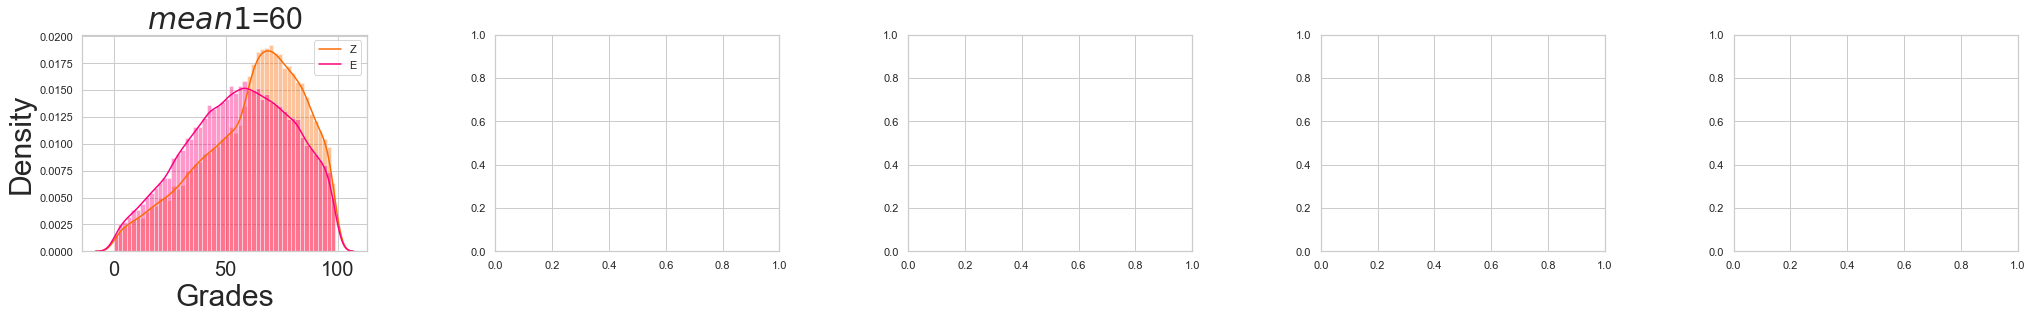

In [530]:
fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

mean_40 = distributions[40]['Data'] 
fig.tight_layout(pad=8)

sns.set_style('whitegrid')
palette = ["magenta", "#FC6A03"]
sns.set(palette=palette)
sns.set_style('whitegrid')
sns.distplot(mean_40[mean_40.G==1].Z_d, ax=ax1[0])
sns.distplot(mean_40[mean_40.G==1].E_d,ax=ax1[0])
ax1[0].legend(['Z', 'E'])
ax1[0].set_title('$mean1$=60', size=30)
ax1[0].set_xlabel('Grades', size=30)
ax1[0].set_ylabel('Density', size=30)
ax1[0].xaxis.set_tick_params(labelsize=20)
fig.savefig('Results_experiment1/1_distributionS1.pdf')

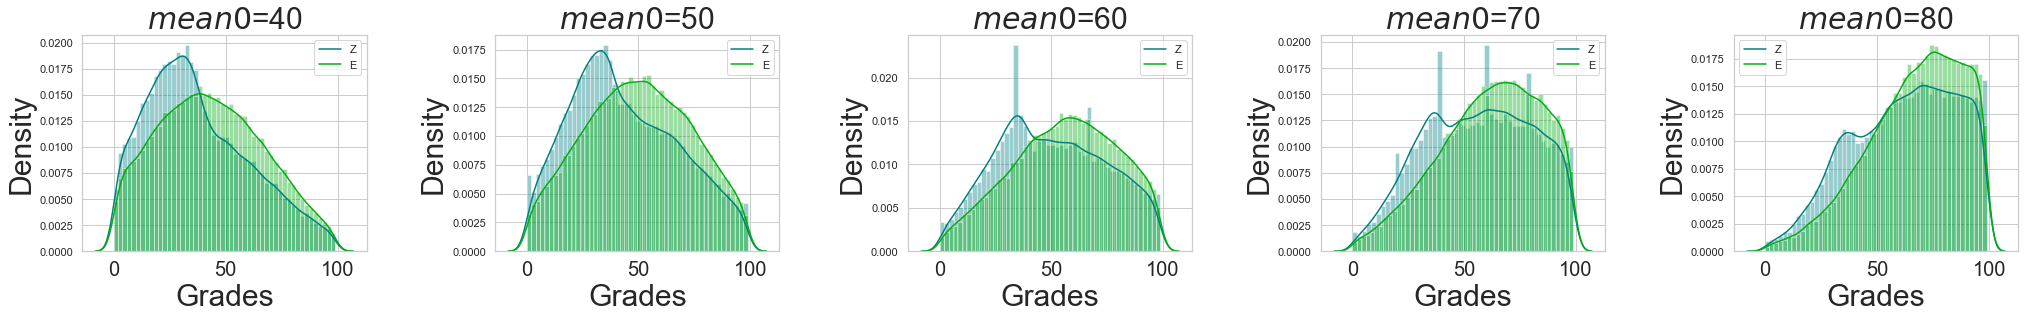

In [532]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))
fig.tight_layout(pad=8)

mean_40 = distributions[40]['Data']
mean_50 = distributions[50]['Data']
mean_60 = distributions[60]['Data']
mean_70 = distributions[70]['Data']
mean_80 = distributions[80]['Data']

sns.set_style('whitegrid')
palette = [ '#008080','#03AC13']
sns.set(palette=palette)
sns.set_style('whitegrid')

sns.distplot(mean_40[mean_40.G==0].Z_d, ax=ax1[0])
sns.distplot(mean_40[mean_40.G==0].E_d,ax=ax1[0])
ax1[0].legend(['Z', 'E'])
ax1[0].set_title('$mean0$=40', size=30)
ax1[0].set_xlabel('Grades', size=30)
ax1[0].set_ylabel('Density', size=30)
ax1[0].xaxis.set_tick_params(labelsize=20)

sns.distplot(mean_50[mean_50.G==0].Z_d, ax=ax1[1])
sns.distplot(mean_50[mean_50.G==0].E_d,ax=ax1[1])
ax1[1].legend(['Z', 'E'])
ax1[1].set_title('$mean0$=50', size=30)
ax1[1].set_xlabel('Grades', size=30)
ax1[1].set_ylabel('Density', size=30)
ax1[1].xaxis.set_tick_params(labelsize=20)

sns.distplot(mean_60[mean_60.G==0].Z_d, ax=ax1[2])
sns.distplot(mean_60[mean_60.G==0].E_d,ax=ax1[2])
ax1[2].legend(['Z', 'E'])
ax1[2].set_title('$mean0$=60', size=30)
ax1[2].set_xlabel('Grades', size=30)
ax1[2].set_ylabel('Density', size=30)
ax1[2].xaxis.set_tick_params(labelsize=20)

sns.distplot(mean_70[mean_70.G==0].Z_d, ax=ax1[3])
sns.distplot(mean_70[mean_70.G==0].E_d,ax=ax1[3])
ax1[3].legend(['Z', 'E'])
ax1[3].set_title('$mean0$=70', size=30)
ax1[3].set_xlabel('Grades', size=30)
ax1[3].set_ylabel('Density', size=30)
ax1[3].xaxis.set_tick_params(labelsize=20)

sns.distplot(mean_80[mean_80.G==0].Z_d, ax=ax1[4])
sns.distplot(mean_80[mean_80.G==0].E_d,ax=ax1[4])
ax1[4].legend(['Z', 'E'])
ax1[4].set_title('$mean0$=80', size=30)
ax1[4].set_xlabel('Grades', size=30)
ax1[4].set_ylabel('Density', size=30)
ax1[4].xaxis.set_tick_params(labelsize=20)

plt.savefig('Results_experiment1/1_distributionsS0.pdf')




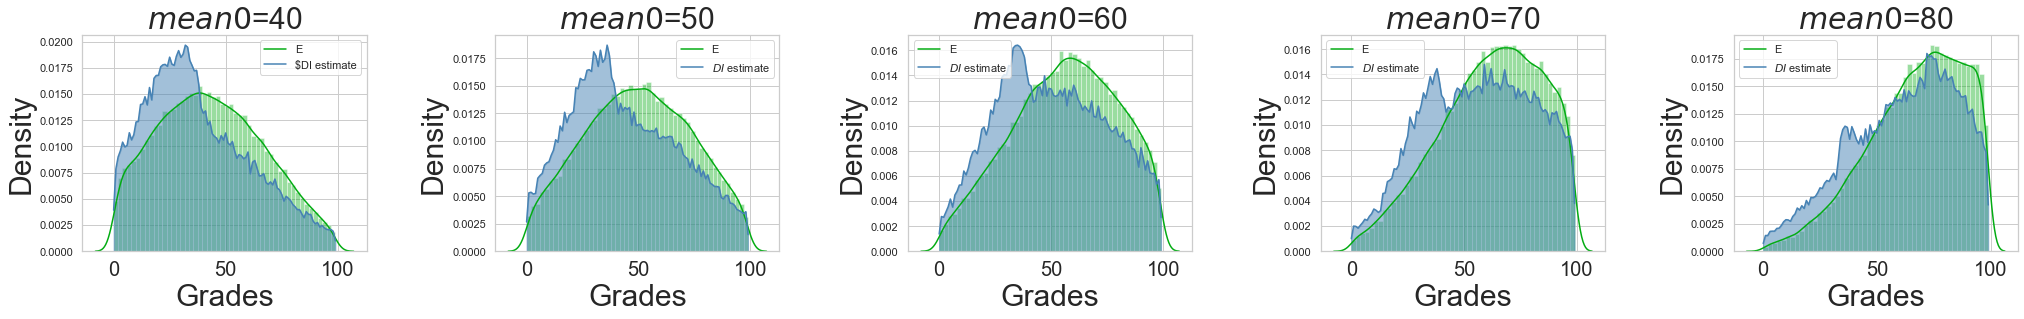

In [534]:


fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))
fig.tight_layout(pad=8)

mean_40 = distributions[40]['DI'][0:100]
mean_50 = distributions[50]['DI'][0:100]
mean_60 = distributions[60]['DI'][0:100]
mean_70 = distributions[70]['DI'][0:100]
mean_80 = distributions[80]['DI'][0:100]

sns.set_style('whitegrid')
palette = ['#03AC13', '#4682B4']
sns.set(palette=palette)
sns.set_style('whitegrid')

sns.distplot(distributions[40]['Data'][distributions[40]['Data'].G==0].E_d,ax=ax1[0])
ax1[0].plot(mean_40)
ax1[0].fill_between(x,mean_40, color='#4682B4', alpha=0.5)
ax1[0].legend(['E', '$DI estimate'])
ax1[0].set_title('$mean0$=40', size=30)
ax1[0].set_xlabel('Grades', size=30)
ax1[0].set_ylabel('Density', size=30)
ax1[0].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[50]['Data'][distributions[50]['Data'].G==0].E_d,ax=ax1[1])
ax1[1].plot(mean_50)
ax1[1].fill_between(x,mean_50, color='#4682B4', alpha=0.5)
ax1[1].legend(['E', '$DI$ estimate'])
ax1[1].set_title('$mean0$=50', size=30)
ax1[1].set_xlabel('Grades', size=30)
ax1[1].set_ylabel('Density', size=30)
ax1[1].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[60]['Data'][distributions[60]['Data'].G==0].E_d,ax=ax1[2])
ax1[2].plot(mean_60)
ax1[2].fill_between(x,mean_60, color='#4682B4', alpha=0.5)
ax1[2].legend(['E', '$DI$ estimate'])
ax1[2].set_title('$mean0$=60', size=30)
ax1[2].set_xlabel('Grades', size=30)
ax1[2].set_ylabel('Density', size=30)
ax1[2].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[70]['Data'][distributions[70]['Data'].G==0].E_d,ax=ax1[3])
ax1[3].plot(mean_70)
ax1[3].fill_between(x,mean_70, color='#4682B4', alpha=0.5)
ax1[3].legend(['E', '$DI$ estimate'])
ax1[3].set_title('$mean0$=70', size=30)
ax1[3].set_xlabel('Grades', size=30)
ax1[3].set_ylabel('Density', size=30)
ax1[3].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[80]['Data'][distributions[80]['Data'].G==0].E_d,ax=ax1[4])
ax1[4].plot(mean_80)
ax1[4].fill_between(x,mean_80, color='#4682B4', alpha=0.5)
ax1[4].legend(['E', '$DI$ estimate'])
ax1[4].set_title('$mean0$=80', size=30)
ax1[4].set_xlabel('Grades', size=30)
ax1[4].set_ylabel('Density', size=30)
ax1[4].xaxis.set_tick_params(labelsize=20)

plt.savefig('Results_experiment1/1_distributionsDIS0.pdf')



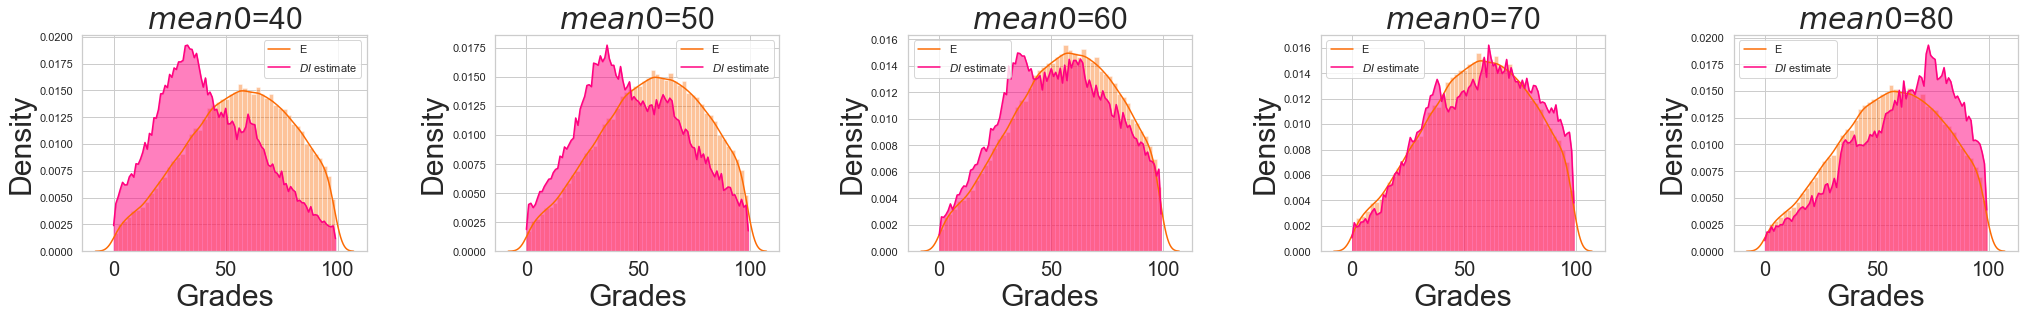

In [542]:


fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))
fig.tight_layout(pad=8)


mean_40 = distributions[40]['DI'][100:200]
mean_50 = distributions[50]['DI'][100:200]
mean_60 = distributions[60]['DI'][100:200]
mean_70 = distributions[70]['DI'][100:200]
mean_80 = distributions[80]['DI'][100:200]

sns.set_style('whitegrid')
palette = ['#FC6A03', '#FF007F']
sns.set(palette=palette)
sns.set_style('whitegrid')

sns.distplot(distributions[60]['Data'][distributions[60]['Data'].G==1].E_d,ax=ax1[0])
ax1[0].plot(mean_40)
ax1[0].fill_between(x,mean_40, color='#FF007F', alpha=0.5)
ax1[0].legend(['E', '$DI$ estimate'])
ax1[0].set_title('$mean0$=40', size=30)
ax1[0].set_xlabel('Grades', size=30)
ax1[0].set_ylabel('Density', size=30)
ax1[0].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[60]['Data'][distributions[60]['Data'].G==1].E_d,ax=ax1[1])
ax1[1].plot(mean_50)
ax1[1].fill_between(x,mean_50, color='#FF007F', alpha=0.5)
ax1[1].legend(['E', '$DI$ estimate'])
ax1[1].set_title('$mean0$=50', size=30)
ax1[1].set_xlabel('Grades', size=30)
ax1[1].set_ylabel('Density', size=30)
ax1[1].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[60]['Data'][distributions[60]['Data'].G==1].E_d,ax=ax1[2])
ax1[2].plot(mean_60)
ax1[2].fill_between(x,mean_60, color='#FF007F', alpha=0.5)
ax1[2].legend(['E', '$DI$ estimate'])
ax1[2].set_title('$mean0$=60', size=30)
ax1[2].set_xlabel('Grades', size=30)
ax1[2].set_ylabel('Density', size=30)
ax1[2].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[60]['Data'][distributions[60]['Data'].G==1].E_d,ax=ax1[3])
ax1[3].plot(mean_70)
ax1[3].fill_between(x,mean_70, color='#FF007F', alpha=0.5)
ax1[3].legend(['E', '$DI$ estimate'])
ax1[3].set_title('$mean0$=70', size=30)
ax1[3].set_xlabel('Grades', size=30)
ax1[3].set_ylabel('Density', size=30)
ax1[3].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[60]['Data'][distributions[60]['Data'].G==1].E_d,ax=ax1[4])
ax1[4].plot(mean_80)
ax1[4].fill_between(x,mean_80, color='#FF007F', alpha=0.5)
ax1[4].legend(['E', '$DI$ estimate'])
ax1[4].set_title('$mean0$=80', size=30)
ax1[4].set_xlabel('Grades', size=30)
ax1[4].set_ylabel('Density', size=30)
ax1[4].xaxis.set_tick_params(labelsize=20)

plt.savefig('Results_experiment1/1_distributionsDIS1.pdf')



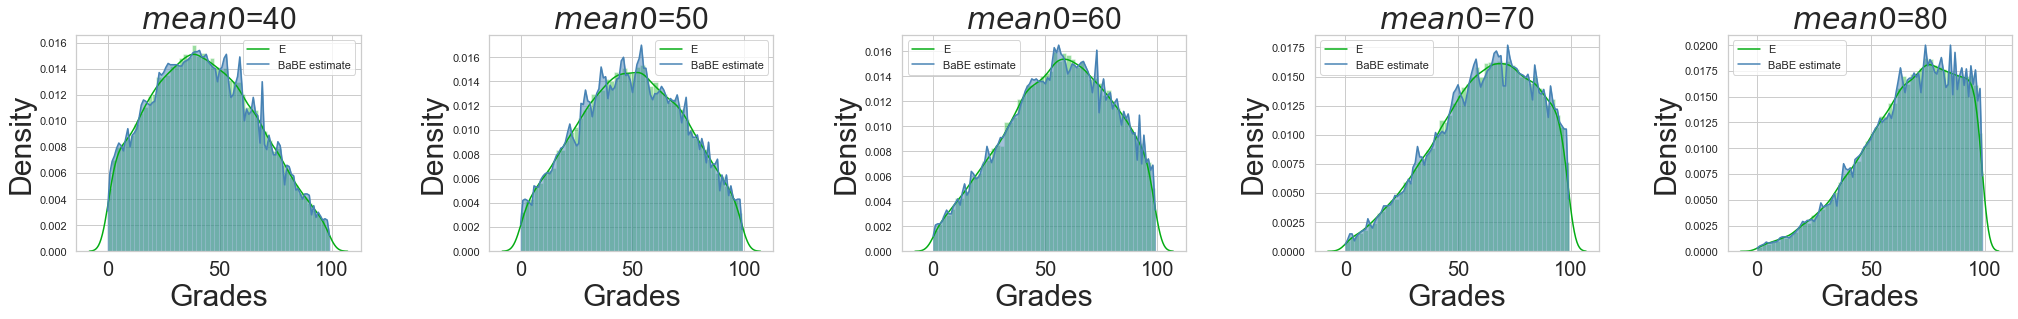

In [538]:
x = [i for i in range(100)]
fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))
fig.tight_layout(pad=8)

mean_40 = list(distributions[40]['IBU'].values())[0:100]
mean_50 = list(distributions[50]['IBU'].values())[0:100]
mean_60 = list(distributions[60]['IBU'].values())[0:100]
mean_70 = list(distributions[70]['IBU'].values())[0:100]
mean_80 = list(distributions[80]['IBU'].values())[0:100]

sns.set_style('whitegrid')
palette = ['#03AC13', '#4682B4']
sns.set(palette=palette)
sns.set_style('whitegrid')

sns.distplot(distributions[40]['Data'][distributions[40]['Data'].G==0].E_d,ax=ax1[0])
ax1[0].plot(mean_40)
ax1[0].fill_between(x,mean_40, color='#4682B4', alpha=0.5)
ax1[0].legend(['E', 'BaBE estimate'])
ax1[0].set_title('$mean0$=40', size=30)
ax1[0].set_xlabel('Grades', size=30)
ax1[0].set_ylabel('Density', size=30)
ax1[0].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[50]['Data'][distributions[50]['Data'].G==0].E_d,ax=ax1[1])
ax1[1].plot(mean_50)
ax1[1].fill_between(x,mean_50, color='#4682B4', alpha=0.5)
ax1[1].legend(['E', 'BaBE estimate'])
ax1[1].set_title('$mean0$=50', size=30)
ax1[1].set_xlabel('Grades', size=30)
ax1[1].set_ylabel('Density', size=30)
ax1[1].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[60]['Data'][distributions[60]['Data'].G==0].E_d,ax=ax1[2])
ax1[2].plot(mean_60)
ax1[2].fill_between(x,mean_60, color='#4682B4', alpha=0.5)
ax1[2].legend(['E', 'BaBE estimate'])
ax1[2].set_title('$mean0$=60', size=30)
ax1[2].set_xlabel('Grades', size=30)
ax1[2].set_ylabel('Density', size=30)
ax1[2].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[70]['Data'][distributions[70]['Data'].G==0].E_d,ax=ax1[3])
ax1[3].plot(mean_70)
ax1[3].fill_between(mean_70,0)
ax1[3].fill_between(x,mean_70, color='#4682B4', alpha=0.5)
ax1[3].legend(['E', 'BaBE estimate'])
ax1[3].set_title('$mean0$=70', size=30)
ax1[3].set_xlabel('Grades', size=30)
ax1[3].set_ylabel('Density', size=30)
ax1[3].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[80]['Data'][distributions[80]['Data'].G==0].E_d,ax=ax1[4])
ax1[4].plot(mean_80)
#sns.lineplot(mean_80,ax=ax1[4])
ax1[4].fill_between(x,mean_80, color='#4682B4', alpha=0.5)
ax1[4].legend(['E', 'BaBE estimate'])
ax1[4].set_title('$mean0$=80', size=30)
ax1[4].set_xlabel('Grades', size=30)
ax1[4].set_ylabel('Density', size=30)
ax1[4].xaxis.set_tick_params(labelsize=20)

plt.savefig('Results_experiment1/1_distributionsBaBES0.pdf')



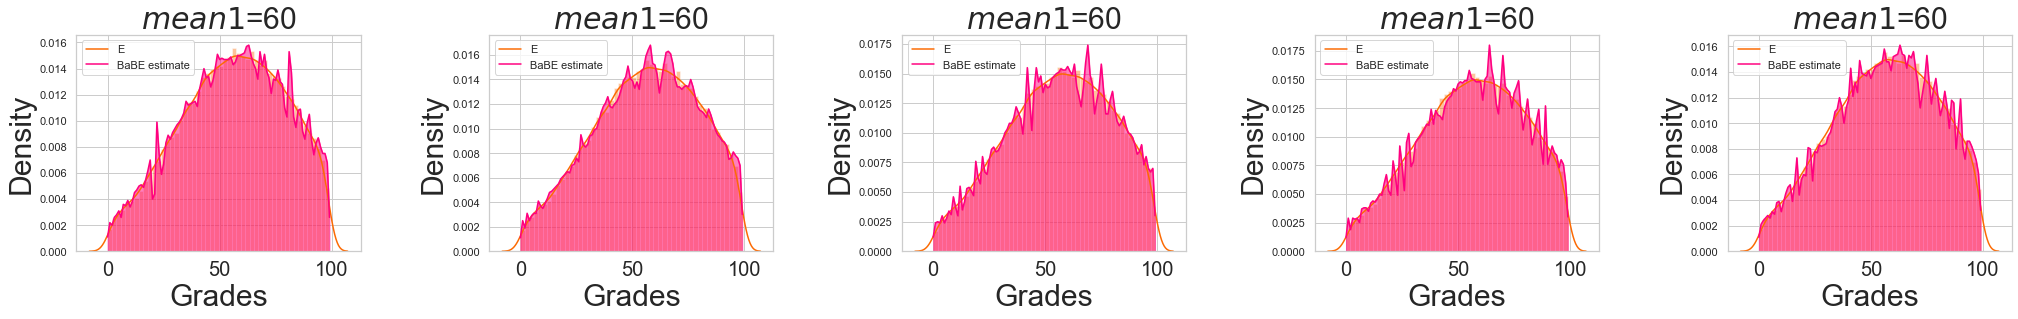

In [543]:
fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))
fig.tight_layout(pad=8)

mean_40 = list(distributions[40]['IBU'].values())[100:200]
mean_50 = list(distributions[50]['IBU'].values())[100:200]
mean_60 = list(distributions[60]['IBU'].values())[100:200]
mean_70 = list(distributions[70]['IBU'].values())[100:200]
mean_80 = list(distributions[80]['IBU'].values())[100:200]

sns.set_style('whitegrid')
palette = ['#FC6A03', '#FF007F']
sns.set(palette=palette)
sns.set_style('whitegrid')

sns.distplot(distributions[60]['Data'][distributions[60]['Data'].G==1].E_d,ax=ax1[0])
ax1[0].plot(mean_40)
ax1[0].fill_between(x,mean_40, color='#FF007F', alpha=0.5)
ax1[0].legend(['E', 'BaBE estimate'])
ax1[0].set_title('$mean1$=60', size=30)
ax1[0].set_xlabel('Grades', size=30)
ax1[0].set_ylabel('Density', size=30)
ax1[0].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[60]['Data'][distributions[60]['Data'].G==1].E_d,ax=ax1[1])
ax1[1].plot(mean_50)
ax1[1].fill_between(x,mean_50, color='#FF007F', alpha=0.5)
ax1[1].legend(['E', 'BaBE estimate'])
ax1[1].set_title('$mean1$=60', size=30)
ax1[1].set_xlabel('Grades', size=30)
ax1[1].set_ylabel('Density', size=30)
ax1[1].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[60]['Data'][distributions[60]['Data'].G==1].E_d,ax=ax1[2])
ax1[2].plot(mean_60)
ax1[2].fill_between(x,mean_60, color='#FF007F', alpha=0.5)
ax1[2].legend(['E', 'BaBE estimate'])
ax1[2].set_title('$mean1$=60', size=30)
ax1[2].set_xlabel('Grades', size=30)
ax1[2].set_ylabel('Density', size=30)
ax1[2].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[60]['Data'][distributions[60]['Data'].G==1].E_d,ax=ax1[3])
ax1[3].plot(mean_70)
ax1[3].fill_between(mean_70,0)
ax1[3].fill_between(x,mean_70, color='#FF007F', alpha=0.5)
ax1[3].legend(['E', 'BaBE estimate'])
ax1[3].set_title('$mean1$=60', size=30)
ax1[3].set_xlabel('Grades', size=30)
ax1[3].set_ylabel('Density', size=30)
ax1[3].xaxis.set_tick_params(labelsize=20)

sns.distplot(distributions[60]['Data'][distributions[60]['Data'].G==1].E_d,ax=ax1[4])
ax1[4].plot(mean_80)
#sns.lineplot(mean_80,ax=ax1[4])
ax1[4].fill_between(x,mean_80, color='#FF007F', alpha=0.5)
ax1[4].legend(['E', 'BaBE estimate'])
ax1[4].set_title('$mean1$=60', size=30)
ax1[4].set_xlabel('Grades', size=30)
ax1[4].set_ylabel('Density', size=30)
ax1[4].xaxis.set_tick_params(labelsize=20)

plt.savefig('Results_experiment1/1_distributionsBaBES1.pdf')



Running Experiments with NB pre-processing

Note: we do not have a right to share the algorithm. For the code please contact: Calders, T., & Verwer, S. (2010). Three naive bayes approaches for discrimination-free classification. Data mining and knowledge discovery, 21, 277-292.

In [447]:
#Naive Bayes
from random import *
from numpy import *
from copy import *
import pandas as pd
import arff

from NB import *
         

for key,datalist in all_dfs.items():
    print('The mean for Group 0',key)
    
     
  
    
    AccYNB = []
    AccYNB0 = []
    AccYNB1 = []


    SPNB=[]
    SP0NB=[]
    SP1NB=[]
    CSP1NB =[]
    CSP01NB=[]
    CSP11NB=[]
    CSP2NB =[]
    CSP02NB=[]
    CSP12NB=[]
    EODNB=[]
    EO0NB=[]
    EO1NB=[]
    
    CSPENB=[]
    CSPE0NB=[] 
    CSPE1NB =[]



        
    for i,data in enumerate(datalist):
      
        df_source, estimate = data
    
        
        for i in range(10):
            print('Sample: ', i)
            df_est, df_test =np.split(estimate.sample(frac=1), [int(.80*len(estimate))])
            
            all_e = df_test.E_d.unique()
            ALL_E = {}
            for e in all_e:
                pe = df_test[df_test.E_d==e].shape[0]/df_test.shape[0]
                ALL_E[e]=pe

            
        # sensitive, class, Z


            #edit
            dfnew = pd.DataFrame([])
            dfnew ['G'] = df_est.G
            dfnew['YZ'] = df_est['YZ'] 
            dfnew['Z_d'] = df_est.Z_d

            dfnew_test = pd.DataFrame([])
            dfnew_test ['G'] = df_test.G
            dfnew_test['YZ'] = df_test['YZ'] 
            dfnew_test['Z_d'] = df_test.Z_d


            numA =1

            aval = '{0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100}'
            name = f'{key}{i}.arff'
            generateArff(numA,aval, name,dfnew, dfnew_test)

             #NB Pre-processing

            #with priors
            labelsEMpZ = testEMp(f'{key}{i}.arff', f'test{key}{i}.arff')

            df_test['YNB']=labelsEMpZ      


            #NB metrics

            AccYNB.append(accuracy_score(df_test['YNB'], df_test['YE']))
            AccYNB0.append(accuracy_score(df_test[df_test.G==0].YNB, df_test[df_test.G==0].YE))
            AccYNB1.append(accuracy_score(df_test[df_test.G==1].YNB, df_test[df_test.G==1].YE))

            #SP
            G0 = df_test[(df_test.G==0)&(df_test.YNB==1)].shape[0]/df_test[(df_test.G==0)].shape[0]
            SP0NB.append(G0)
            G1 = df_test[(df_test.G==1)&(df_test.YNB==1)].shape[0]/df_test[(df_test.G==1)].shape[0]
            SP1NB.append(G1)
            SPNB.append(G1-G0)

            #EOD
            # G0 = df_test.loc[(df_test.E_d>threshold)&(df_test.G==0)&(df_test.YNB==1)].shape[0]/df_test.loc[(df_test.E_d>threshold)&(df_test.G==0)].shape[0]
            # G1 = df_test.loc[(df_test.E_d>threshold)&(df_test.G==1)&(df_test.YNB==1)].shape[0]/df_test.loc[(df_test.E_d>threshold)&(df_test.G==1)].shape[0]
            G0 = df_test[(df_test.G==0)&(df_test.YE==1)&(df_test.YNB==1)].shape[0]/df_test[(df_test.G==0)&(df_test.YE==1)].shape[0]
            EO0NB.append(G0)
            G1 = df_test[(df_test.G==1)&(df_test.YE==1)&(df_test.YNB==1)].shape[0]/df_test[(df_test.G==1)&(df_test.YE==1)].shape[0]
            EO1NB.append(G1)
            EODNB.append(G1-G0)   




            #CSP1 Threshold-5
            #Positive decision for e>threshold
            G0 = df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==0)&(df_test.YNB==1)].shape[0]/df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==0)].shape[0]
            CSP01NB.append(G0)
            G1 = df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==1)&(df_test.YNB==1)].shape[0]/df_test.loc[(df_test.E_d==threshold-5)&(df_test.G==1)].shape[0]
            CSP11NB.append(G1)
            CSP1NB.append(G1-G0)

            #CSP2 Threshold+5
            G0 = df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==0)&(df_test.YNB==1)].shape[0]/df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==0)].shape[0]
            CSP02NB.append(G0)
            G1 = df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==1)&(df_test.YNB==1)].shape[0]/df_test.loc[(df_test.E_d==threshold+5)&(df_test.G==1)].shape[0]
            CSP12NB.append(G1)
            CSP2NB.append(G1-G0)  
            
            #CSP E
            
            G0=0
            G1=0
            for e, pe in ALL_E.items():
                size0 = df_test.loc[(df_test.E_d==e)&(df_test.G==0)].shape[0]
                size1 = df_test.loc[(df_test.E_d==e)&(df_test.G==1)].shape[0]
                if size0==0:
                    g0=0
                else:
                
                    g0 = df_test.loc[(df_test.E_d==e)&(df_test.G==0)&(df_test.YNB==1)].shape[0]/size0
                    #print(g0)
#                     print(pe)

                G0 += g0*pe
                #print(G0)
                
                
                if size1==0:
                    g1=0
                else:
                
                    g1 = df_test.loc[(df_test.E_d==e)&(df_test.G==1)&(df_test.YNB==1)].shape[0]/size1

                G1 += g1*pe
                #print(G1)
                
    
    
            CSPE0NB.append(G0)
           # print(G0)
            CSPE1NB.append(G1)
           # print(G1)
            CSPENB.append(G1-G0)
           # print(G1-G0)

 
    
    

    #NB


    results[key]['AccYNB']=AccYNB
    results[key]['AccYNB0']=AccYNB0
    results[key]['AccYNB1']=AccYNB1
    results[key]['SPNB']=SPNB
    results[key]['SP0NB']=SP0NB
    results[key]['SP1NB']=SP1NB
    results[key]['EODNB']=EODNB
    results[key]['EO0NB']=EO0NB 
    results[key]['EO1NB']=EO1NB 
    results[key]['CSP1NB']=CSP1NB
    results[key]['CSP01NB']=CSP01NB 
    results[key]['CSP11NB']=CSP11NB
    results[key]['CSP2NB']=CSP2NB
    results[key]['CSP02NB']=CSP02NB 
    results[key]['CSP12NB']=CSP12NB
    results[key]['CSPENB']=CSPENB
    results[key]['CSPE0NB']=CSPE0NB 
    results[key]['CSPE1NB']=CSPE1NB


   

The mean for Group 0 40.0
Sample:  0
Acc EMp: 1.0
Disc EMP: 0.4023011034843224
Sample:  1
Acc EMp: 1.0
Disc EMP: 0.411583976095083
Sample:  2
Acc EMp: 1.0
Disc EMP: 0.4047673378550061
Sample:  3
Acc EMp: 1.0
Disc EMP: 0.40344192972974613
Sample:  4
Acc EMp: 1.0
Disc EMP: 0.4024171586804285
Sample:  5
Acc EMp: 1.0
Disc EMP: 0.4071928691172534
Sample:  6
Acc EMp: 1.0
Disc EMP: 0.40298242484515795
Sample:  7
Acc EMp: 1.0
Disc EMP: 0.40427701685903955
Sample:  8
Acc EMp: 1.0
Disc EMP: 0.40134695131436754
Sample:  9
Acc EMp: 1.0
Disc EMP: 0.411049011655685
The mean for Group 0 50.0
Sample:  0
Acc EMp: 1.0
Disc EMP: 0.3315369244579552
Sample:  1
Acc EMp: 1.0
Disc EMP: 0.32479064150155884
Sample:  2
Acc EMp: 1.0
Disc EMP: 0.3229077472152144
Sample:  3
Acc EMp: 1.0
Disc EMP: 0.32931188508150067
Sample:  4
Acc EMp: 1.0
Disc EMP: 0.33167454581190187
Sample:  5
Acc EMp: 1.0
Disc EMP: 0.32419305683996946
Sample:  6
Acc EMp: 1.0
Disc EMP: 0.3212336712781183
Sample:  7
Acc EMp: 1.0
Disc EMP: 0.31929

In [460]:


results40=pd.DataFrame(results[40])
results50=pd.DataFrame(results[50])
results60=pd.DataFrame(results[60])
results70=pd.DataFrame(results[70])
results80=pd.DataFrame(results[80])

for res in [results40,results50,results60,results70,results80]:
    n=df_test.shape[0]
    n0 = df_test[df_test.G==0].shape[0]
    n1 = df_test[df_test.G==1].shape[0]
    res['MEDI08']=res.MEDI08 /n 
    res['MEDI080']=res.MEDI080/n0
    res['MEDI081']=res.MEDI081/n1
    res['MEIBU']=res.MEIBU /n 
    res['MEIBU0']=res.MEIBU0/n0
    res['MEIBU1']=res.MEIBU1/n1
    res['MEY0'] = res.MEY0/n0
    res['MEY1'] = res.MEY1/n1
    res['MEY']=res.MEY /n 


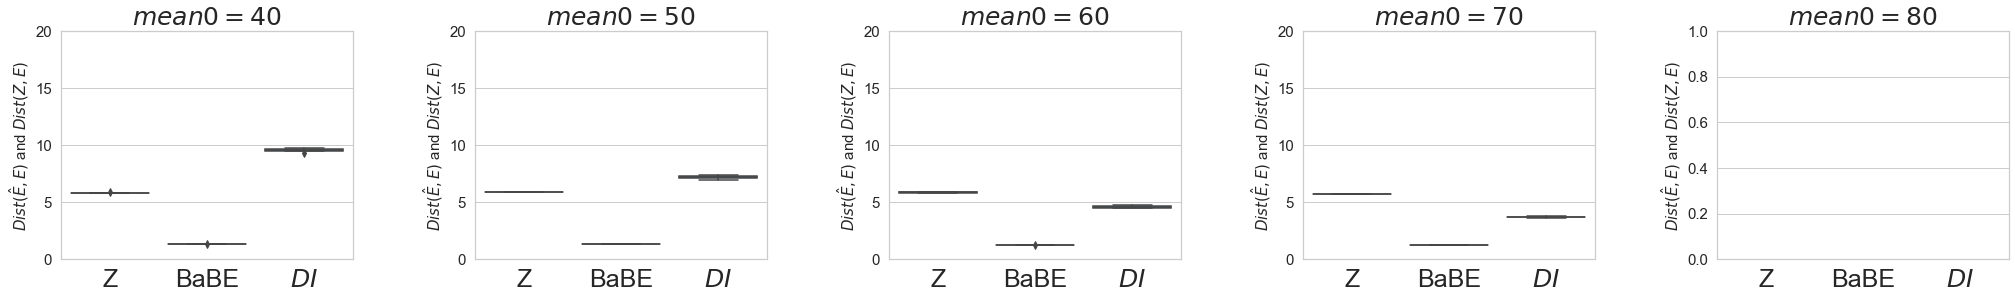

In [464]:
size1=25
size2 =15
size3=15
pad = 9

%matplotlib inline
import seaborn as sns
fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#Dist E
sns.boxplot(data =results40[['MEY', 'MEIBU','MEDI08']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel(r'$\mathit{Dist}(\hat{E}, E)$ and $\mathit{Dist}(Z, E)$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[0].set_ylim(0,20)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['MEY', 'MEIBU','MEDI08' ]] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel(r'$\mathit{Dist}(\hat{E}, E)$ and $\mathit{Dist}(Z, E)$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[1].set_ylim(0,20)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['MEY', 'MEIBU','MEDI08']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel(r'$\mathit{Dist}(\hat{E}, E)$ and $\mathit{Dist}(Z, E)$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[2].set_ylim(0,20)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['MEY', 'MEIBU','MEDI08']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel(r'$\mathit{Dist}(\hat{E}, E)$ and $\mathit{Dist}(Z, E)$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[3].set_ylim(0,20)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['MEY', 'MEIBU','MEDI08']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel(r'$\mathit{Dist}(\hat{E}, E)$ and $\mathit{Dist}(Z, E)$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[4].set_ylim(0,1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})


plt.savefig('Results_experiment1/1_dist_e.pdf')

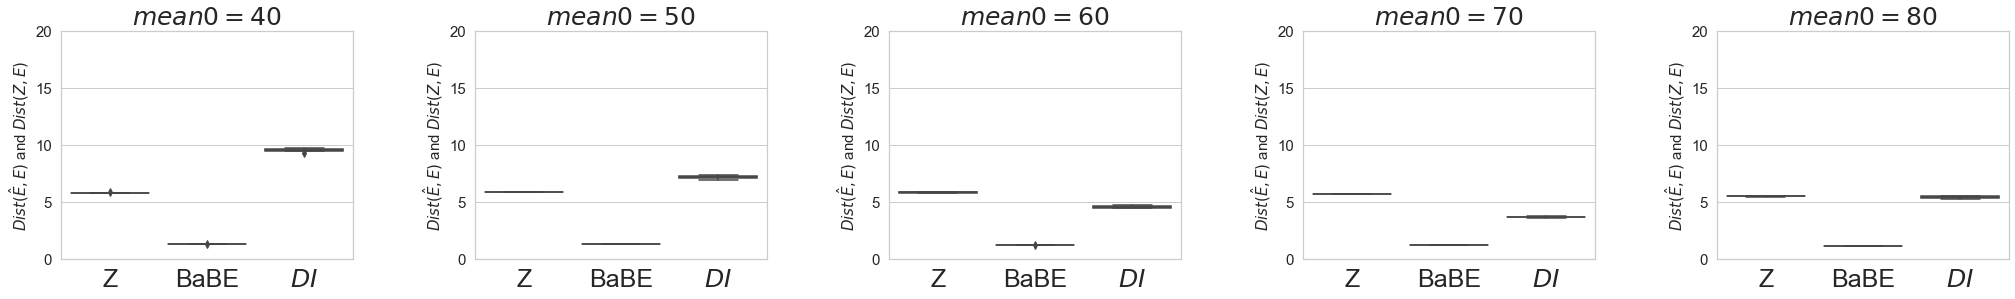

In [465]:
size1=25
size2 =15
size3=15
pad = 9

%matplotlib inline
import seaborn as sns
fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#Dist E
sns.boxplot(data =results40[['MEY', 'MEIBU','MEDI08']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel(r'$\mathit{Dist}(\hat{E}, E)$ and $\mathit{Dist}(Z, E)$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[0].set_ylim(0,20)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['MEY', 'MEIBU','MEDI08' ]] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel(r'$\mathit{Dist}(\hat{E}, E)$ and $\mathit{Dist}(Z, E)$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[1].set_ylim(0,20)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['MEY', 'MEIBU','MEDI08']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel(r'$\mathit{Dist}(\hat{E}, E)$ and $\mathit{Dist}(Z, E)$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[2].set_ylim(0,20)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['MEY', 'MEIBU','MEDI08']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel(r'$\mathit{Dist}(\hat{E}, E)$ and $\mathit{Dist}(Z, E)$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[3].set_ylim(0,20)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['MEY', 'MEIBU','MEDI08']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel(r'$\mathit{Dist}(\hat{E}, E)$ and $\mathit{Dist}(Z, E)$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[4].set_ylim(0,20)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})


plt.savefig('Results_experiment1/1_dist_e.pdf')

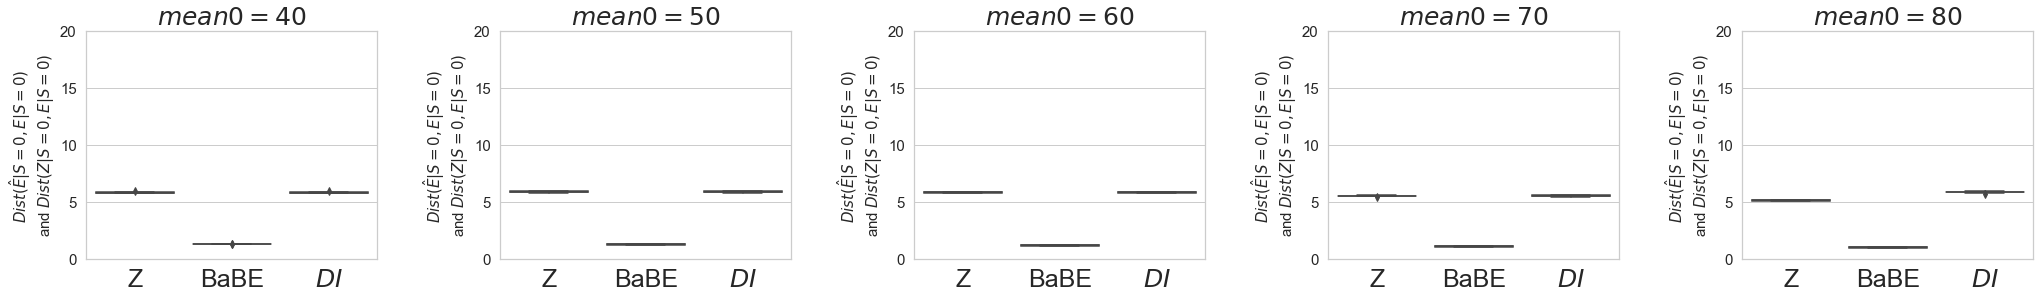

In [466]:



import seaborn as sns
fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)




#Dist E
sns.boxplot(data =results40[['MEY0', 'MEIBU0','MEDI080']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$\mathit{Dist}(\hat{E}|S=0, E|S=0)$ \nand $\mathit{Dist}(Z|S=0, E|S=0)$',size=size3, multialignment='center')
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[0].set_ylim(0,20)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['MEY0', 'MEIBU0','MEDI080' ]] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$\mathit{Dist}(\hat{E}|S=0, E|S=0)$ \nand $\mathit{Dist}(Z|S=0, E|S=0)$',size=size3, multialignment='center')
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[1].set_ylim(0,20)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['MEY0', 'MEIBU0','MEDI080']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$\mathit{Dist}(\hat{E}|S=0, E|S=0)$ \nand $\mathit{Dist}(Z|S=0, E|S=0)$',size=size3, multialignment='center')
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[2].set_ylim(0,20)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['MEY0', 'MEIBU0','MEDI080']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$\mathit{Dist}(\hat{E}|S=0, E|S=0)$ \nand $\mathit{Dist}(Z|S=0, E|S=0)$',size=size3, multialignment='center')
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[3].set_ylim(0,20)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['MEY0', 'MEIBU0','MEDI080']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$\mathit{Dist}(\hat{E}|S=0, E|S=0)$ \nand $\mathit{Dist}(Z|S=0, E|S=0)$',size=size3, multialignment='center')
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[4].set_ylim(0,20)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})


plt.savefig('Results_experiment1/1_dist_e0.pdf')

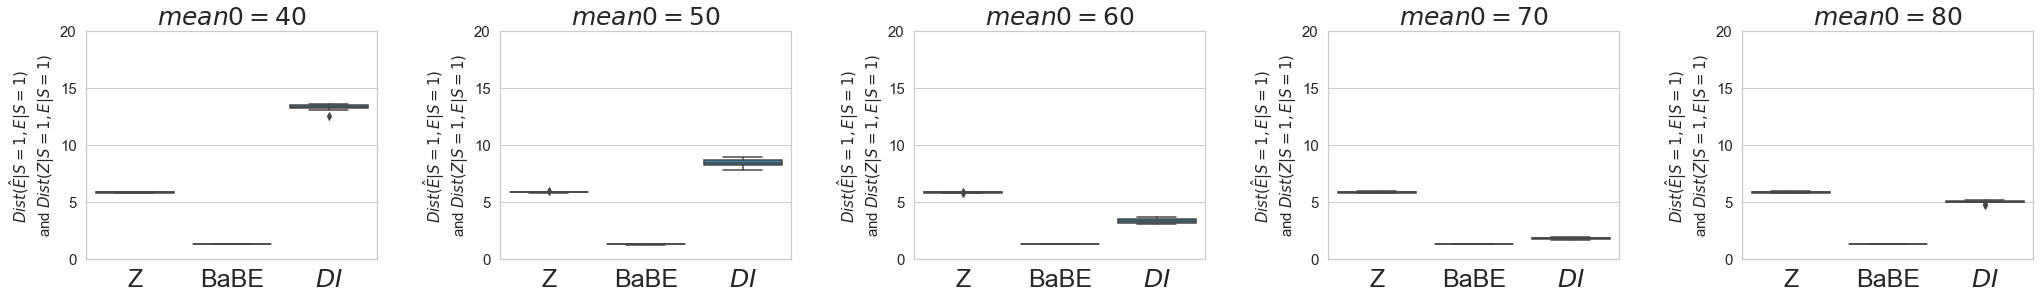

In [472]:


import seaborn as sns
fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)




#Dist E
sns.boxplot(data =results40[['MEY1', 'MEIBU1','MEDI081']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$\mathit{Dist}(\hat{E}|S=1, E|S=1)$ \nand $\mathit{Dist}(Z|S=1, E|S=1)$',size=size3, multialignment='center')
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[0].set_ylim(0,20)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['MEY1', 'MEIBU1','MEDI081']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$\mathit{Dist}(\hat{E}|S=1, E|S=1)$ \nand $\mathit{Dist}(Z|S=1, E|S=1)$',size=size3, multialignment='center')
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[1].set_ylim(0,20)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['MEY1', 'MEIBU1','MEDI081']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$\mathit{Dist}(\hat{E}|S=1, E|S=1)$ \nand $\mathit{Dist}(Z|S=1, E|S=1)$',size=size3, multialignment='center')
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[2].set_ylim(0,20)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['MEY1', 'MEIBU1','MEDI081']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$\mathit{Dist}(\hat{E}|S=1, E|S=1)$ \nand $\mathit{Dist}(Z|S=1, E|S=1)$',size=size3, multialignment='center')
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[3].set_ylim(0,20)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['MEY1', 'MEIBU1','MEDI081']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$\mathit{Dist}(\hat{E}|S=1, E|S=1)$ \nand $\mathit{Dist}(Z|S=1, E|S=1)$',size=size3, multialignment='center')
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[4].set_ylim(0,20)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})


plt.savefig('Results_experiment1/1_dist_e1.pdf')

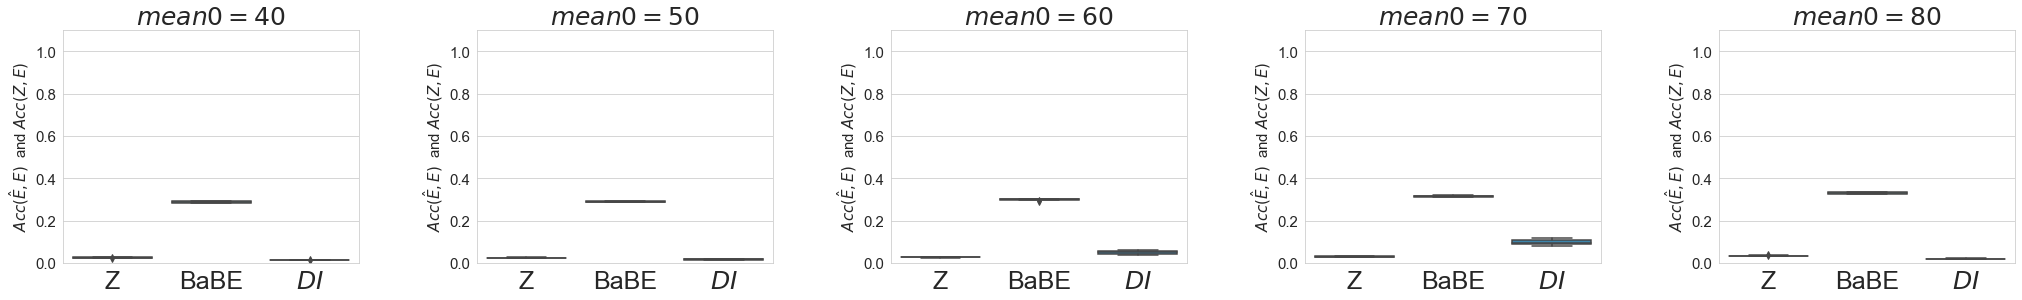

In [90]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#ACC E
sns.boxplot(data =results40[['ACCEZ', 'AccEIBU','AccEDI08']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel(r'$\mathit{Acc}(\hat{E}, E)$  and $\mathit{Acc}(Z,E)$' ,size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[0].set_ylim(0,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['ACCEZ', 'AccEIBU','AccEDI08']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel(r'$\mathit{Acc}(\hat{E}, E)$  and $\mathit{Acc}(Z,E)$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[1].set_ylim(0,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['ACCEZ', 'AccEIBU','AccEDI08']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel(r'$\mathit{Acc}(\hat{E}, E)$  and $\mathit{Acc}(Z,E)$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[2].set_ylim(0,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['ACCEZ', 'AccEIBU','AccEDI08']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel(r'$\mathit{Acc}(\hat{E}, E)$  and $\mathit{Acc}(Z,E)$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[3].set_ylim(0,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['ACCEZ', 'AccEIBU','AccEDI08']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel(r'$\mathit{Acc}(\hat{E}, E)$  and $\mathit{Acc}(Z,E)$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[4].set_ylim(0,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})

plt.savefig('Results_experiment1/1_acc_e.pdf')

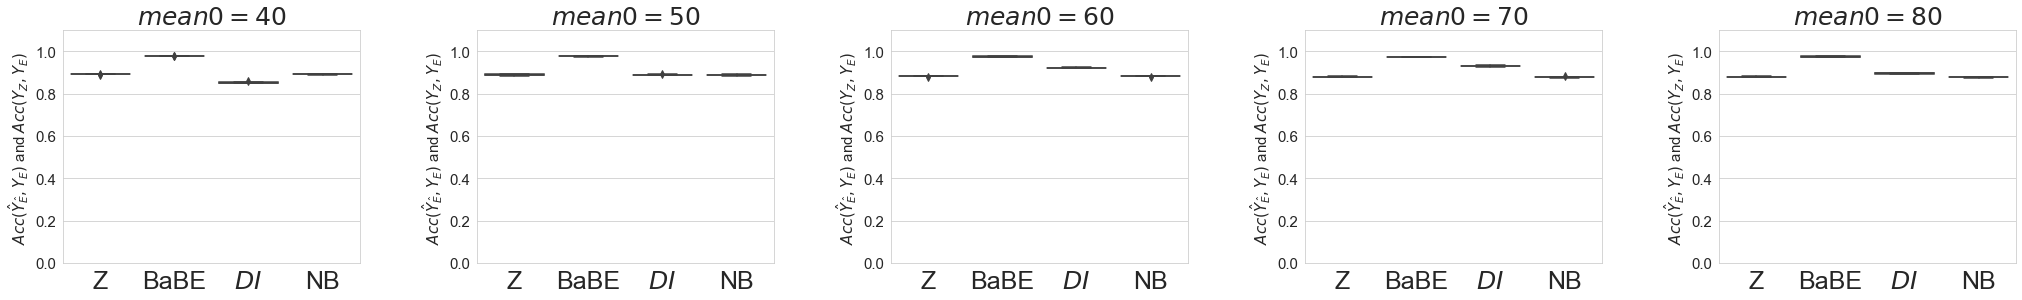

In [91]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#ACC Y
sns.boxplot(data =results40[['ACCY', 'AccYIBU','AccYDI08','AccYNB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel(r'$\mathit{Acc}(\hat{Y}_{\hat{E}}, Y_E)$ and $\mathit{Acc}(Y_{Z}, Y_E)$ ' ,size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(0,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['ACCY', 'AccYIBU','AccYDI08','AccYNB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel(r'$\mathit{Acc}(\hat{Y}_{\hat{E}}, Y_E)$ and $\mathit{Acc}(Y_{Z}, Y_E)$ ',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(0,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['ACCY', 'AccYIBU','AccYDI08','AccYNB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel(r'$\mathit{Acc}(\hat{Y}_{\hat{E}}, Y_E)$ and $\mathit{Acc}(Y_{Z}, Y_E)$ ',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(0,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['ACCY', 'AccYIBU','AccYDI08','AccYNB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel(r'$\mathit{Acc}(\hat{Y}_{\hat{E}}, Y_E)$ and $\mathit{Acc}(Y_{Z}, Y_E)$ ',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(0,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['ACCY', 'AccYIBU','AccYDI08','AccYNB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel(r'$\mathit{Acc}(\hat{Y}_{\hat{E}}, Y_E)$ and $\mathit{Acc}(Y_{Z}, Y_E)$ ',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(0,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.savefig('Results_experiment1/1_acc_y.pdf')

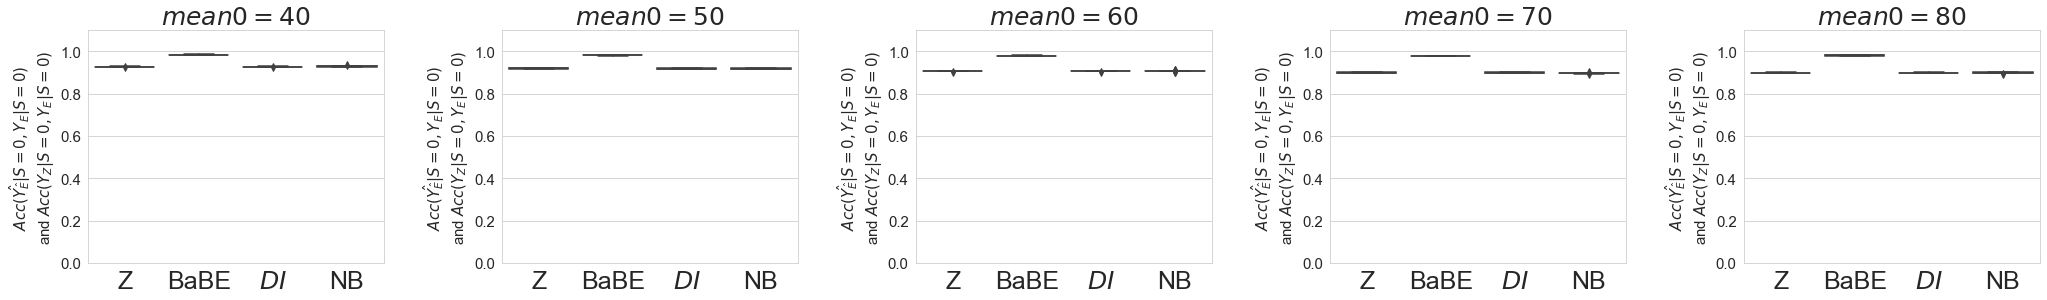

In [92]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#ACC Y
sns.boxplot(data =results40[['ACCY0', 'AccYIBU0','AccYDI080','AccYNB0']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$\mathit{Acc}(\hat{Y_{\hat{E}}}|S=0, Y_E|S=0)$ \nand $\mathit{Acc}(Y_Z|S=0, Y_E|S=0)$',size=size3,   multialignment='center')
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(0,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['ACCY0', 'AccYIBU0','AccYDI080','AccYNB0']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$\mathit{Acc}(\hat{Y_{\hat{E}}}|S=0, Y_E|S=0)$ \nand $\mathit{Acc}(Y_Z|S=0, Y_E|S=0)$',size=size3,   multialignment='center')
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(0,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['ACCY0', 'AccYIBU0','AccYDI080','AccYNB0']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$\mathit{Acc}(\hat{Y_{\hat{E}}}|S=0, Y_E|S=0)$ \nand $\mathit{Acc}(Y_Z|S=0, Y_E|S=0)$',size=size3,   multialignment='center')
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(0,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['ACCY0', 'AccYIBU0','AccYDI080','AccYNB0']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$\mathit{Acc}(\hat{Y_{\hat{E}}}|S=0, Y_E|S=0)$ \nand $\mathit{Acc}(Y_Z|S=0, Y_E|S=0)$',size=size3,   multialignment='center')
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(0,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['ACCY0', 'AccYIBU0','AccYDI080','AccYNB0']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$\mathit{Acc}(\hat{Y_{\hat{E}}}|S=0, Y_E|S=0)$ \nand $\mathit{Acc}(Y_Z|S=0, Y_E|S=0)$',size=size3,   multialignment='center')
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(0,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.savefig('Results_experiment1/1_acc_y0.pdf')

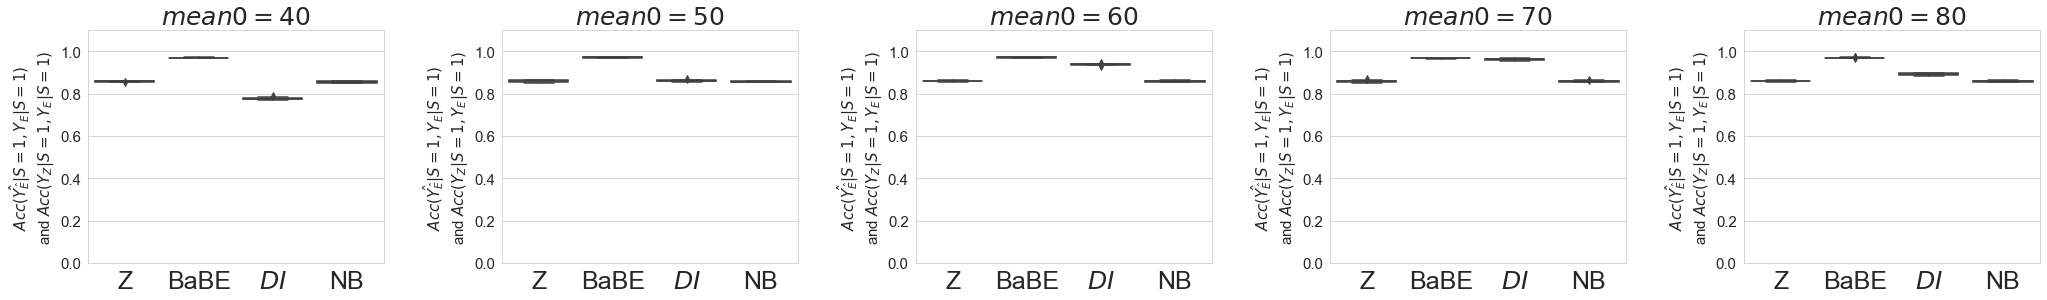

In [93]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#ACC Y
sns.boxplot(data =results40[['ACCY1', 'AccYIBU1','AccYDI081','AccYNB1']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$\mathit{Acc}(\hat{Y_{\hat{E}}}|S=1, Y_E|S=1)$ \nand $\mathit{Acc}(Y_Z|S=1, Y_E|S=1)$',size=size3,   multialignment='center')
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(0,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['ACCY1', 'AccYIBU1','AccYDI081','AccYNB1']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$\mathit{Acc}(\hat{Y_{\hat{E}}}|S=1, Y_E|S=1)$ \nand $\mathit{Acc}(Y_Z|S=1, Y_E|S=1)$',size=size3,   multialignment='center')
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(0,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['ACCY1', 'AccYIBU1','AccYDI081','AccYNB1']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$\mathit{Acc}(\hat{Y_{\hat{E}}}|S=1, Y_E|S=1)$ \nand $\mathit{Acc}(Y_Z|S=1, Y_E|S=1)$',size=size3,   multialignment='center')
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(0,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['ACCY1', 'AccYIBU1','AccYDI081','AccYNB1']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$\mathit{Acc}(\hat{Y_{\hat{E}}}|S=1, Y_E|S=1)$ \nand $\mathit{Acc}(Y_Z|S=1, Y_E|S=1)$',size=size3,   multialignment='center')
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(0,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['ACCY1', 'AccYIBU1','AccYDI081','AccYNB1']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$\mathit{Acc}(\hat{Y_{\hat{E}}}|S=1, Y_E|S=1)$ \nand $\mathit{Acc}(Y_Z|S=1, Y_E|S=1)$',size=size3,   multialignment='center')
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(0,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.savefig('Results_experiment1/1_acc_y1.pdf')

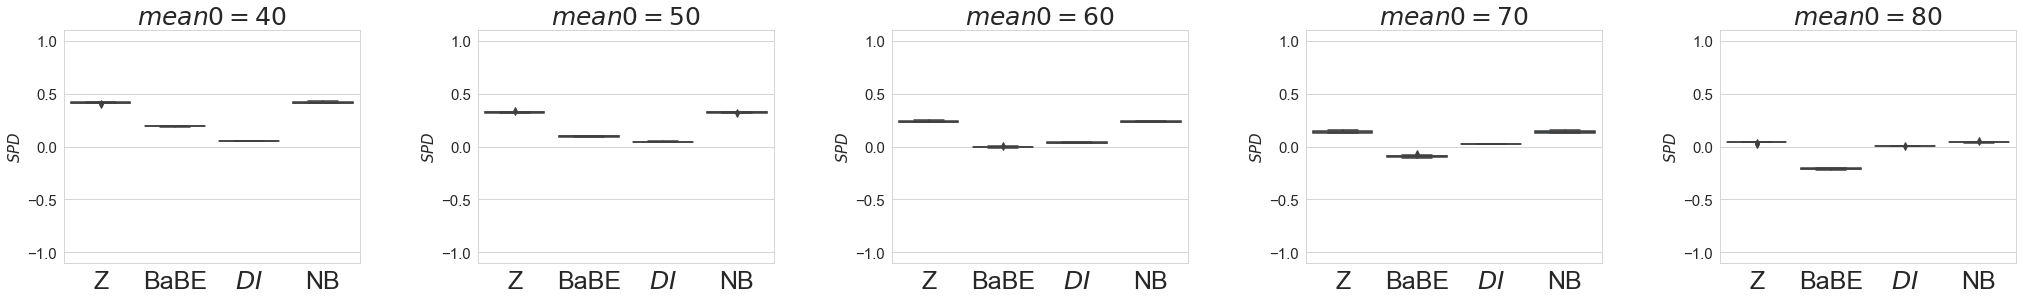

In [94]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#SP
sns.boxplot(data =results40[['SPY', 'SPIBU','SPDI08','SPNB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel(r'$\mathit{SPD}$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['SPY', 'SPIBU','SPDI08','SPNB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel(r'$\mathit{SPD}$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['SPY', 'SPIBU','SPDI08','SPNB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel(r'$\mathit{SPD}$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['SPY', 'SPIBU','SPDI08','SPNB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel(r'$\mathit{SPD}$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['SPY', 'SPIBU','SPDI08','SPNB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel(r'$\mathit{SPD}$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})

plt.savefig('Results_experiment1/1_spd.pdf')

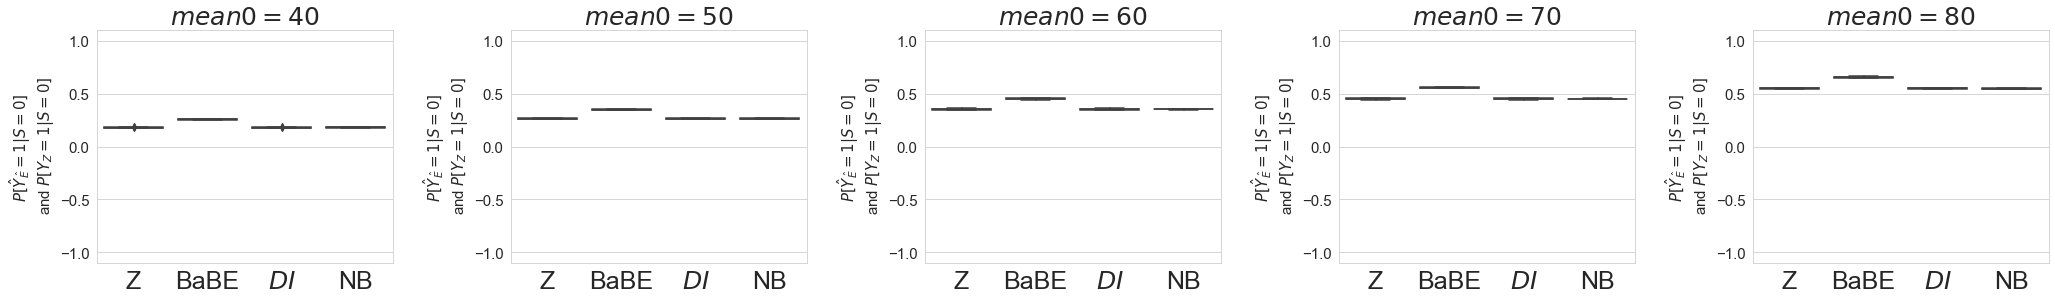

In [95]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#SP
sns.boxplot(data =results40[['SP0Y', 'SP0IBU','SP0DI08','SP0NB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|S=0]$ \n and $P[Y_Z=1|S=0]$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['SP0Y', 'SP0IBU','SP0DI08','SP0NB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|S=0]$ \n and $P[Y_Z=1|S=0]$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['SP0Y', 'SP0IBU','SP0DI08','SP0NB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|S=0]$ \n and $P[Y_Z=1|S=0]$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['SP0Y', 'SP0IBU','SP0DI08','SP0NB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|S=0]$ \n and $P[Y_Z=1|S=0]$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['SP0Y', 'SP0IBU','SP0DI08','SP0NB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|S=0]$ \n and $P[Y_Z=1|S=0]$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})

plt.savefig('Results_experiment1/1_sp0.pdf')

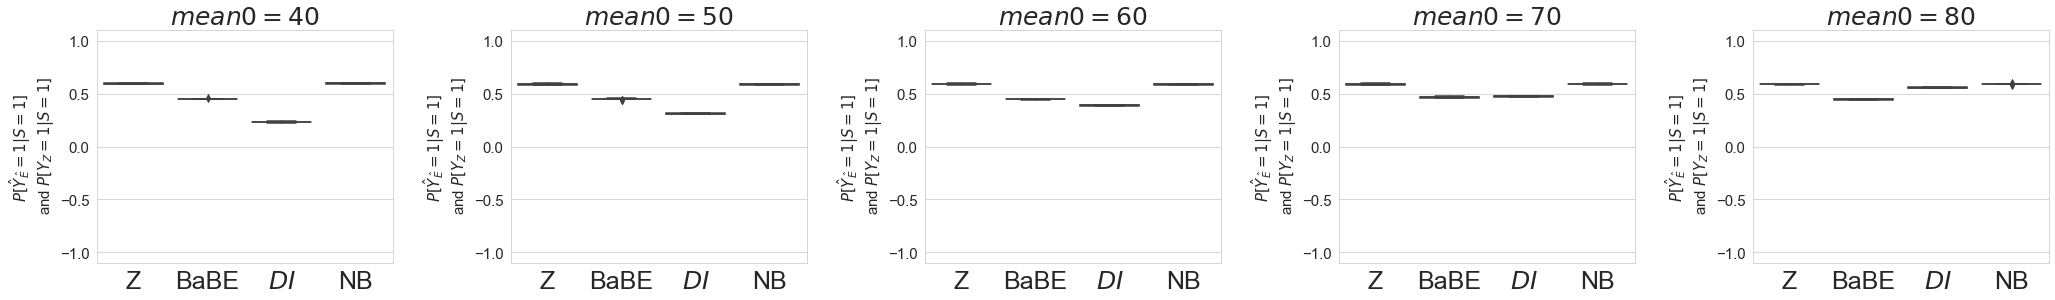

In [96]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#SP
sns.boxplot(data =results40[['SP1Y', 'SP1IBU','SP1DI08','SP1NB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|S=1]$ \n and $P[Y_Z=1|S=1]$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['SP1Y', 'SP1IBU','SP1DI08','SP1NB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|S=1]$ \n and $P[Y_Z=1|S=1]$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['SP1Y', 'SP1IBU','SP1DI08','SP1NB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|S=1]$ \n and $P[Y_Z=1|S=1]$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['SP1Y', 'SP1IBU','SP1DI08','SP1NB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|S=1]$ \n and $P[Y_Z=1|S=1]$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['SP1Y', 'SP1IBU','SP1DI08','SP1NB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|S=1]$ \n and $P[Y_Z=1|S=1]$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})

plt.savefig('Results_experiment1/1_sp1.pdf')

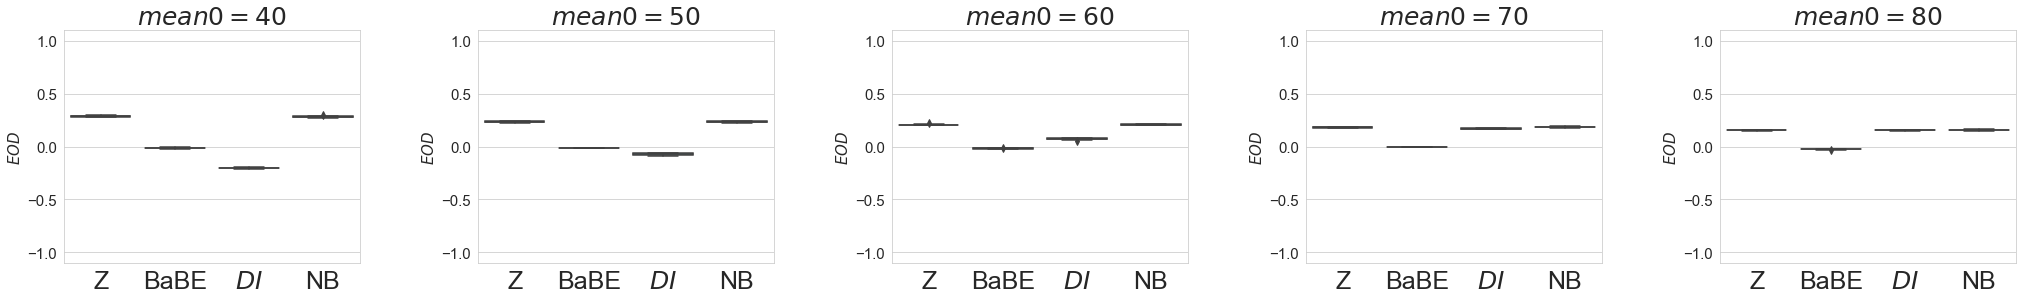

In [97]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#EOD
sns.boxplot(data =results40[['EODY', 'EODIBU','EODDI08','EODNB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel(r'$\mathit{EOD}$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['EODY', 'EODIBU','EODDI08','EODNB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel(r'$\mathit{EOD}$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['EODY', 'EODIBU','EODDI08','EODNB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel(r'$\mathit{EOD}$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['EODY', 'EODIBU','EODDI08','EODNB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel(r'$\mathit{EOD}$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['EODY', 'EODIBU','EODDI08','EODNB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel(r'$\mathit{EOD}$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.savefig('Results_experiment1/1_eod.pdf')

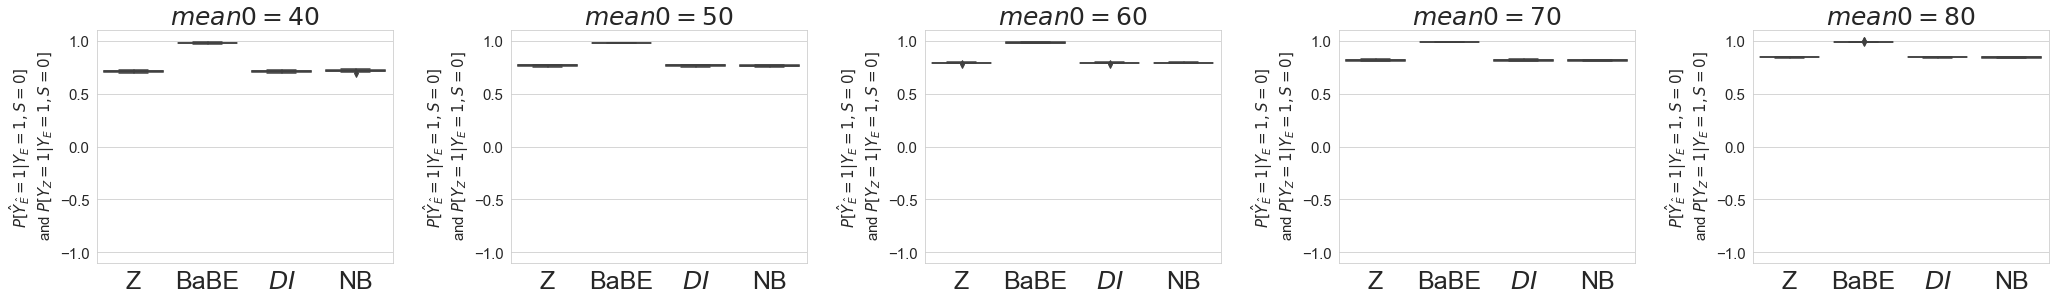

In [98]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#EOD
sns.boxplot(data =results40[['EO0Y', 'EO0IBU','EO0DI08','EO0NB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$ P[\hat{Y}_{\hat{E}}=1|Y_E=1,S=0]$ \n and $ P[Y_Z=1|Y_E=1,S=0]$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['EO0Y', 'EO0IBU','EO0DI08','EO0NB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$ P[\hat{Y}_{\hat{E}}=1|Y_E=1,S=0]$ \n and $ P[Y_Z=1|Y_E=1,S=0]$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['EO0Y', 'EO0IBU','EO0DI08','EO0NB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$ P[\hat{Y}_{\hat{E}}=1|Y_E=1,S=0]$ \n and $ P[Y_Z=1|Y_E=1,S=0]$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['EO0Y', 'EO0IBU','EO0DI08','EO0NB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$ P[\hat{Y}_{\hat{E}}=1|Y_E=1,S=0]$ \n and $ P[Y_Z=1|Y_E=1,S=0]$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['EO0Y', 'EO0IBU','EO0DI08','EO0NB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$ P[\hat{Y}_{\hat{E}}=1|Y_E=1,S=0]$ \n and $ P[Y_Z=1|Y_E=1,S=0]$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.savefig('Results_experiment1/1_eo0.pdf')

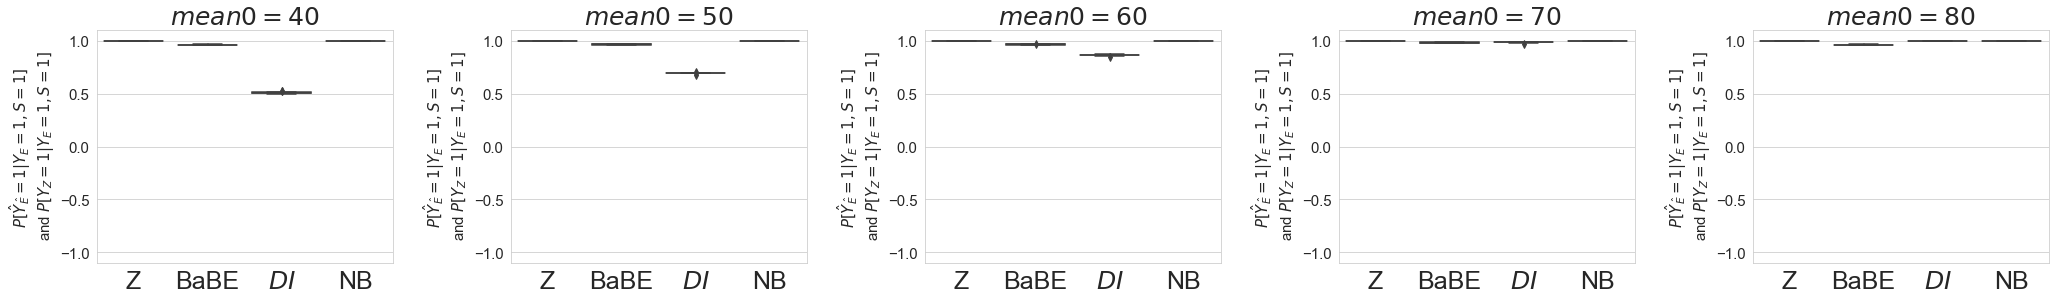

In [99]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#EOD
sns.boxplot(data =results40[['EO1Y', 'EO1IBU','EO1DI08','EO1NB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$ P[\hat{Y}_{\hat{E}}=1|Y_E=1,S=1]$ \n and $ P[Y_Z=1|Y_E=1,S=1]$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['EO1Y', 'EO1IBU','EO1DI08','EO1NB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$ P[\hat{Y}_{\hat{E}}=1|Y_E=1,S=1]$ \n and $ P[Y_Z=1|Y_E=1,S=1]$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['EO1Y', 'EO1IBU','EO1DI08','EO1NB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$ P[\hat{Y}_{\hat{E}}=1|Y_E=1,S=1]$ \n and $ P[Y_Z=1|Y_E=1,S=1]$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['EO1Y', 'EO1IBU','EO1DI08','EO1NB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$ P[\hat{Y}_{\hat{E}}=1|Y_E=1,S=1]$ \n and $ P[Y_Z=1|Y_E=1,S=1]$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['EO1Y', 'EO1IBU','EO1DI08','EO1NB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$ P[\hat{Y}_{\hat{E}}=1|Y_E=1,S=1]$ \n and $ P[Y_Z=1|Y_E=1,S=1]$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.savefig('Results_experiment1/1_eo1.pdf')

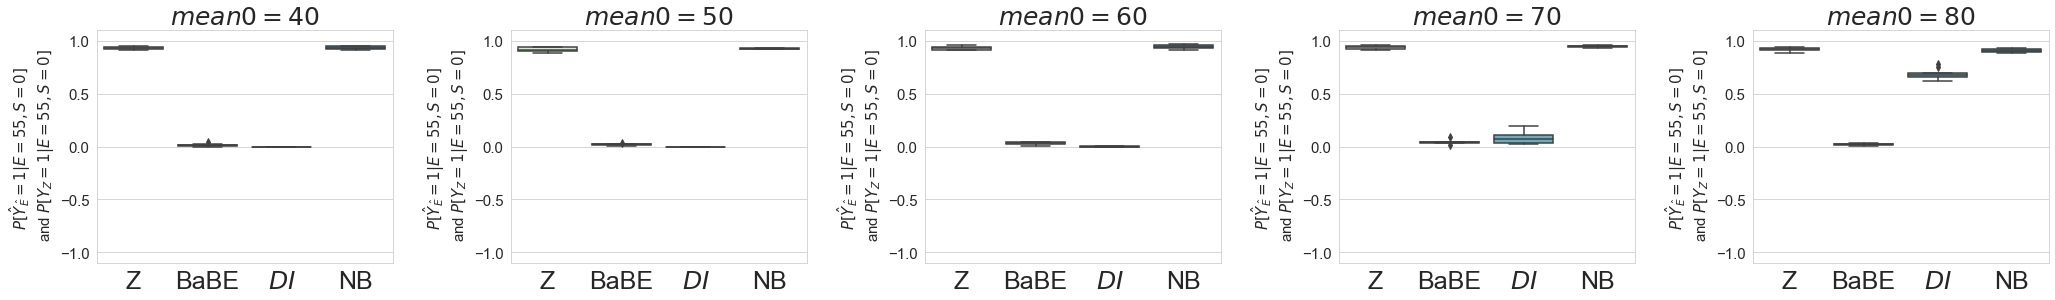

In [100]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#CSP1
sns.boxplot(data =results40[['CSP1Y', 'CSP1IBU','CSP1DI08','CSP1NB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=55, S=0]$ \n and $P[Y_Z=1|E=55, S=0]$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['CSP1Y', 'CSP1IBU','CSP1DI08','CSP1NB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=55, S=0]$ \n and $P[Y_Z=1|E=55, S=0]$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['CSP1Y', 'CSP1IBU','CSP1DI08','CSP1NB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=55, S=0]$ \n and $P[Y_Z=1|E=55, S=0]$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['CSP1Y', 'CSP1IBU','CSP1DI08','CSP1NB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=55, S=0]$ \n and $P[Y_Z=1|E=55, S=0]$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['CSP1Y', 'CSP1IBU','CSP1DI08','CSP1NB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=55, S=0]$ \n and $P[Y_Z=1|E=55, S=0]$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})

plt.savefig('Results_experiment1/1_csp1.pdf')

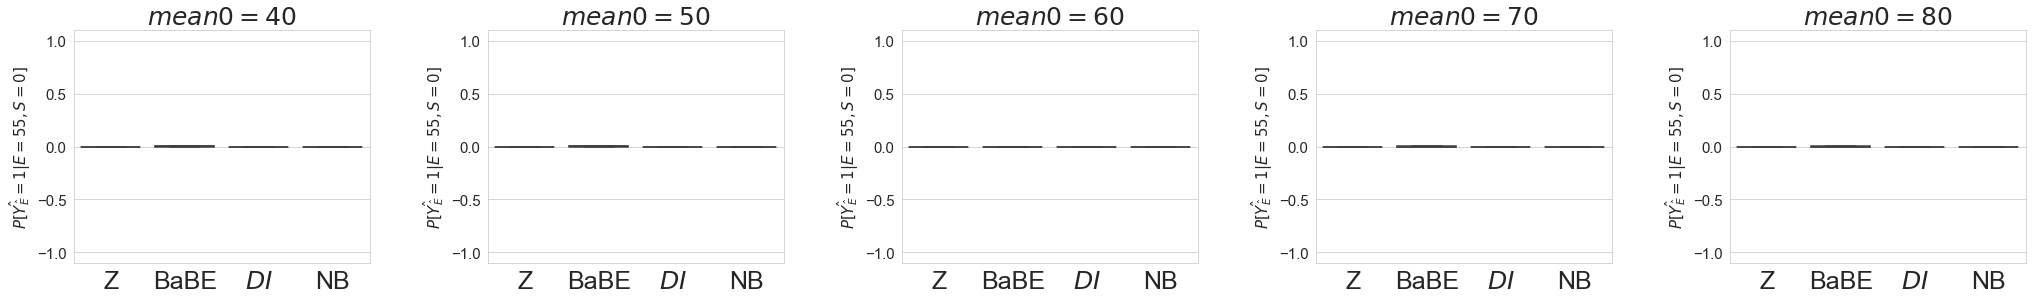

In [101]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#CSP1
sns.boxplot(data =results40[['CSP01Y', 'CSP01IBU','CSP01DI08','CSP01NB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$P[\hat{Y_{\hat{E}}}=1|E=55, S=0]$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['CSP01Y', 'CSP01IBU','CSP01DI08','CSP01NB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$P[\hat{Y_{\hat{E}}}=1|E=55, S=0]$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['CSP01Y', 'CSP01IBU','CSP01DI08','CSP01NB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$P[\hat{Y_{\hat{E}}}=1|E=55, S=0]$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['CSP01Y', 'CSP01IBU','CSP01DI08','CSP01NB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$P[\hat{Y_{\hat{E}}}=1|E=55, S=0]$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['CSP01Y', 'CSP01IBU','CSP01DI08','CSP01NB']] , palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$P[\hat{Y_{\hat{E}}}=1|E=55, S=0]$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})

plt.savefig('Results_experiment1/1_csp01.pdf')

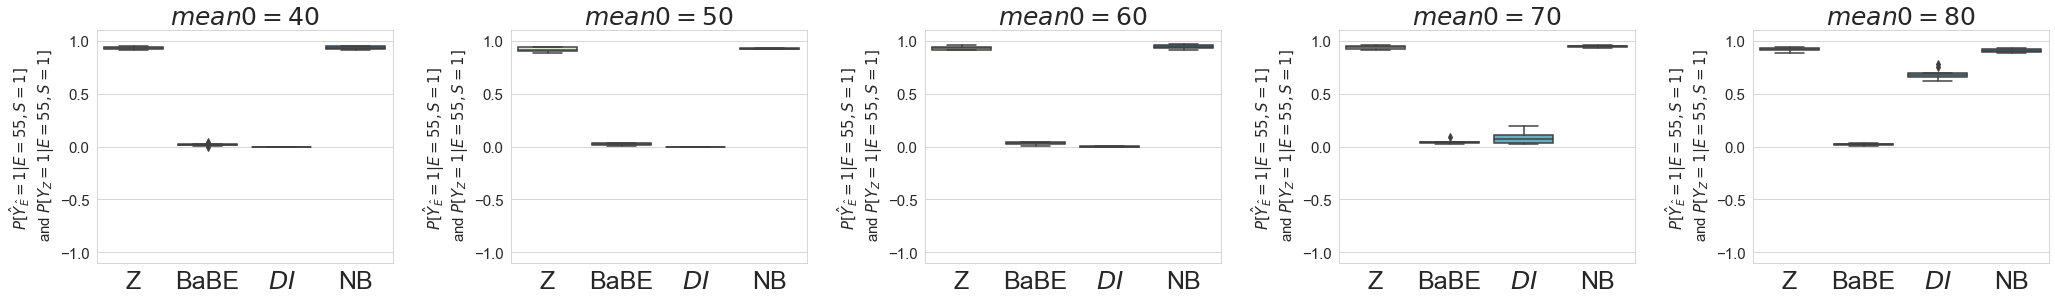

In [102]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)


#CSP1
sns.boxplot(data =results40[['CSP11Y', 'CSP11IBU','CSP11DI08','CSP11NB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=55, S=1]$ \n and $P[Y_Z=1|E=55, S=1]$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['CSP11Y', 'CSP11IBU','CSP11DI08','CSP11NB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=55, S=1]$ \n and $P[Y_Z=1|E=55, S=1]$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['CSP11Y', 'CSP11IBU','CSP11DI08','CSP11NB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=55, S=1]$ \n and $P[Y_Z=1|E=55, S=1]$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['CSP11Y', 'CSP11IBU','CSP11DI08','CSP11NB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=55, S=1]$ \n and $P[Y_Z=1|E=55, S=1]$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['CSP11Y', 'CSP11IBU','CSP11DI08','CSP11NB']] , palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=55, S=1]$ \n and $P[Y_Z=1|E=55, S=1]$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})

plt.savefig('Results_experiment1/1_csp11.pdf')

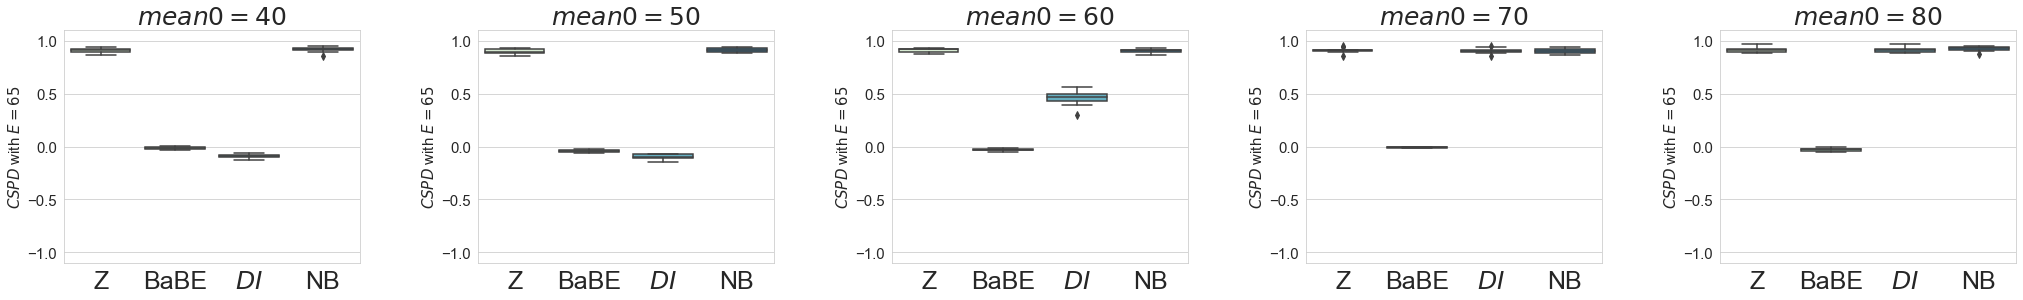

In [103]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)

#CSP2
sns.boxplot(data =results40[['CSP2Y', 'CSP2IBU','CSP2DI08','CSP2NB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel(r'$\mathit{CSPD}$ with $E=65$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['CSP2Y', 'CSP2IBU','CSP2DI08','CSP2NB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel(r'$\mathit{CSPD}$ with $E=65$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['CSP2Y', 'CSP2IBU','CSP2DI08','CSP2NB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel(r'$\mathit{CSPD}$ with $E=65$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['CSP2Y', 'CSP2IBU','CSP2DI08','CSP2NB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel(r'$\mathit{CSPD}$ with $E=65$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['CSP2Y', 'CSP2IBU','CSP2DI08','CSP2NB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel(r'$\mathit{CSPD}$ with $E=65$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})

plt.savefig('Results_experiment1/1_csp2.pdf')

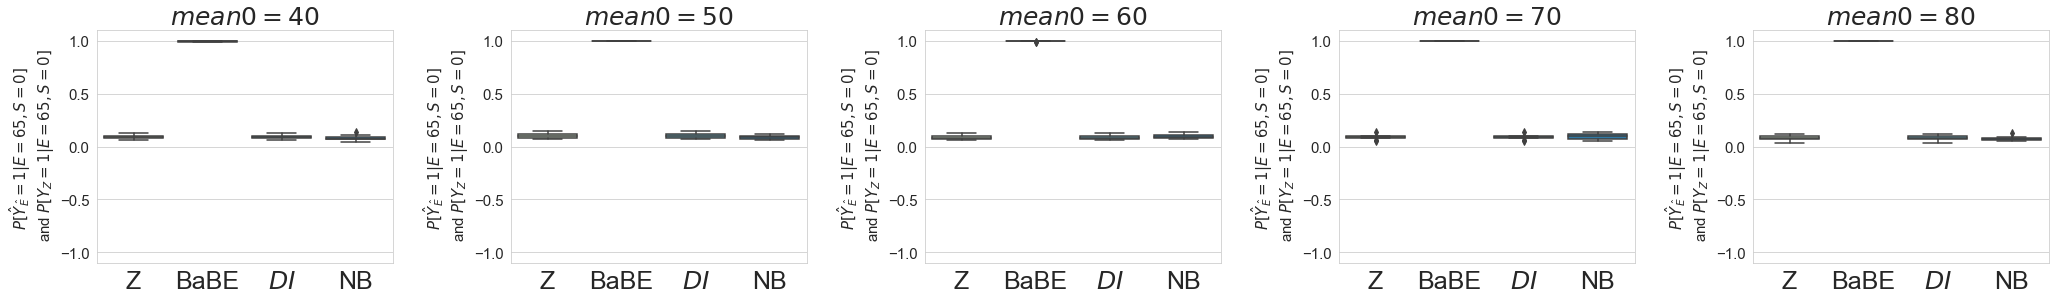

In [104]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)

#CSP2
sns.boxplot(data =results40[['CSP02Y', 'CSP02IBU','CSP02DI08','CSP02NB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=65, S=0]$ \n and $P[Y_Z=1|E=65, S=0]$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['CSP02Y', 'CSP02IBU','CSP02DI08','CSP02NB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=65, S=0]$ \n and $P[Y_Z=1|E=65, S=0]$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['CSP02Y', 'CSP02IBU','CSP02DI08','CSP02NB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=65, S=0]$ \n and $P[Y_Z=1|E=65, S=0]$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['CSP02Y', 'CSP02IBU','CSP02DI08','CSP02NB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=65, S=0]$ \n and $P[Y_Z=1|E=65, S=0]$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['CSP02Y', 'CSP02IBU','CSP02DI08','CSP02NB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=65, S=0]$ \n and $P[Y_Z=1|E=65, S=0]$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})

plt.savefig('Results_experiment1/1_csp02.pdf')

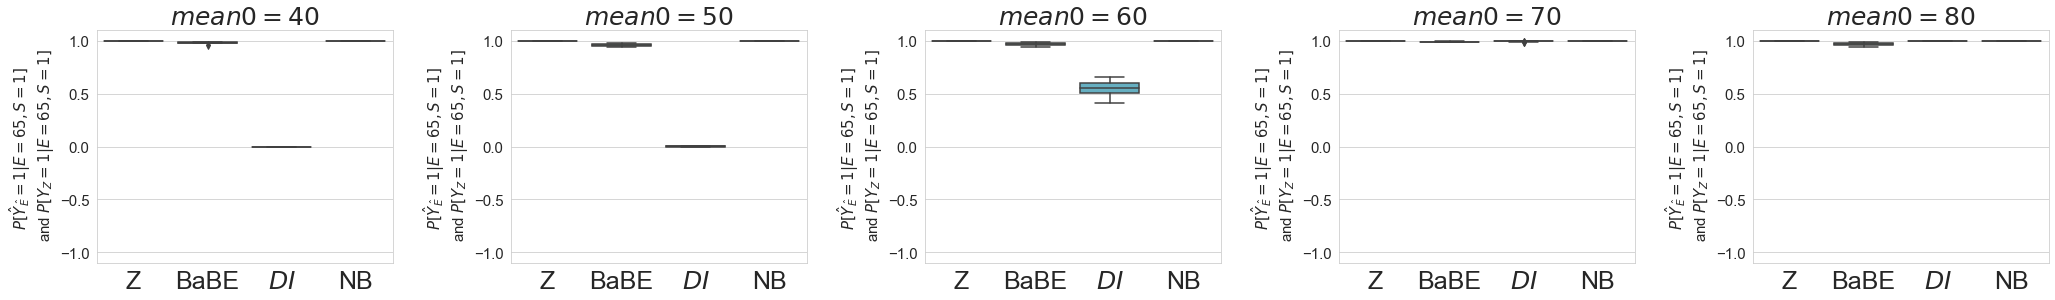

In [105]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)

#CSP2
sns.boxplot(data =results40[['CSP12Y', 'CSP12IBU','CSP12DI08','CSP12NB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=65, S=1]$ \n and $P[Y_Z=1|E=65, S=1]$',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results50[['CSP12Y', 'CSP12IBU','CSP12DI08','CSP12NB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=65, S=1]$ \n and $P[Y_Z=1|E=65, S=1]$',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results60[['CSP12Y', 'CSP12IBU','CSP12DI08','CSP12NB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=65, S=1]$ \n and $P[Y_Z=1|E=65, S=1]$',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results70[['CSP12Y', 'CSP12IBU','CSP12DI08','CSP12NB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=65, S=1]$ \n and $P[Y_Z=1|E=65, S=1]$',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)

sns.boxplot(data =results80[['CSP12Y', 'CSP12IBU','CSP12DI08','CSP12NB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E=65, S=1]$ \n and $P[Y_Z=1|E=65, S=1]$',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)

sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})

plt.savefig('Results_experiment1/1_csp12.pdf')

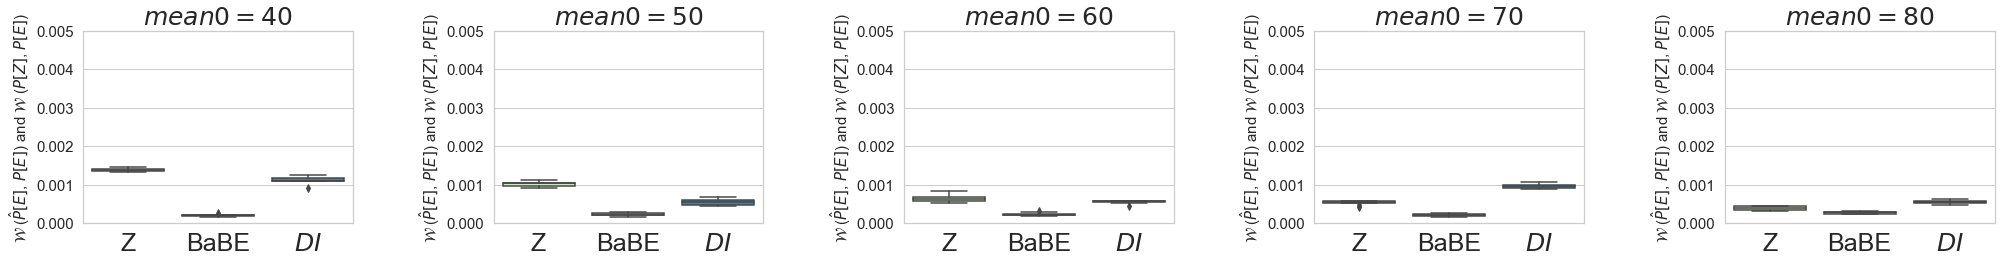

In [428]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)

#W dist
sns.boxplot(data =results40[['WdistZ', 'WdistIBU','WdistDI08']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel(r'$\mathcal{W}$ ($\hat{P}[E]$, $P[E]$) and $\mathcal{W}$ ($P[Z]$, $P[E]$)',size=size3)
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[0].set_ylim(0,0.005)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results50[['WdistZ', 'WdistIBU','WdistDI08']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel(r'$\mathcal{W}$ ($\hat{P}[E]$, $P[E]$) and $\mathcal{W}$ ($P[Z]$, $P[E]$)',size=size3)
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[1].set_ylim(0,0.005)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results60[['WdistZ', 'WdistIBU','WdistDI08']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel(r'$\mathcal{W}$ ($\hat{P}[E]$, $P[E]$) and $\mathcal{W}$ ($P[Z]$, $P[E]$)',size=size3)
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[2].set_ylim(0,0.005)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results70[['WdistZ', 'WdistIBU','WdistDI08']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel(r'$\mathcal{W}$ ($\hat{P}[E]$, $P[E]$) and $\mathcal{W}$ ($P[Z]$, $P[E]$)',size=size3)
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[3].set_ylim(0,0.005)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results80[['WdistZ', 'WdistIBU','WdistDI08']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel(r'$\mathcal{W}$ ($\hat{P}[E]$, $P[E]$) and $\mathcal{W}$ ($P[Z]$, $P[E]$)',size=size3)
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[4].set_ylim(0,0.005)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)


sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.savefig('Results_experiment1/1_w.pdf')

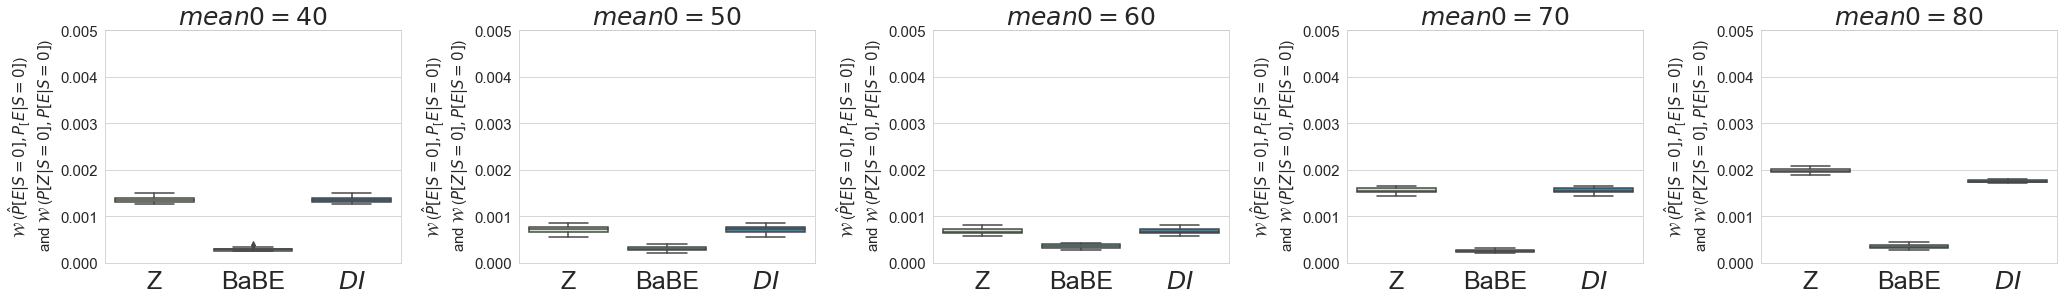

In [107]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)

#W dist
sns.boxplot(data =results40[['WdistZ0', 'WdistIBU0','WdistDI080']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$\mathcal{W}$ ($\hat{P}[E|S=0],P_[E|S=0]$)\n and $\mathcal{W}$ ($P[Z|S=0],P[E|S=0]$)',size=size3,  multialignment='center')
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[0].set_ylim(0,0.005)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results50[['WdistZ0', 'WdistIBU0','WdistDI080']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$\mathcal{W}$ ($\hat{P}[E|S=0],P_[E|S=0]$)\n and $\mathcal{W}$ ($P[Z|S=0],P[E|S=0]$)',size=size3,  multialignment='center')
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[1].set_ylim(0,0.005)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results60[['WdistZ0', 'WdistIBU0','WdistDI080']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$\mathcal{W}$ ($\hat{P}[E|S=0],P_[E|S=0]$)\n and $\mathcal{W}$ ($P[Z|S=0],P[E|S=0]$)',size=size3,  multialignment='center')
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[2].set_ylim(0,0.005)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results70[['WdistZ0', 'WdistIBU0','WdistDI080']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$\mathcal{W}$ ($\hat{P}[E|S=0],P_[E|S=0]$)\n and $\mathcal{W}$ ($P[Z|S=0],P[E|S=0]$)',size=size3,  multialignment='center')
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[3].set_ylim(0,0.005)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results80[['WdistZ0', 'WdistIBU0','WdistDI080']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$\mathcal{W}$ ($\hat{P}[E|S=0],P_[E|S=0]$)\n and $\mathcal{W}$ ($P[Z|S=0],P[E|S=0]$)',size=size3,  multialignment='center')
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[4].set_ylim(0,0.005)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)


sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.savefig('Results_experiment1/1_w0.pdf')

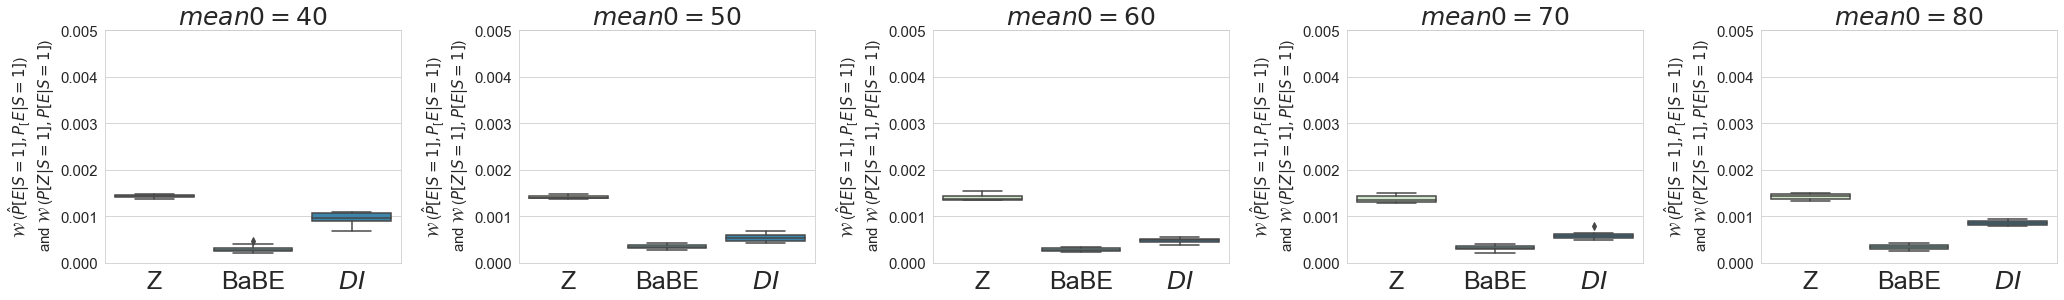

In [108]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=pad)

#W dist
sns.boxplot(data =results40[['WdistZ1', 'WdistIBU1','WdistDI081']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$\mathcal{W}$ ($\hat{P}[E|S=1],P_[E|S=1]$)\n and $\mathcal{W}$ ($P[Z|S=1],P[E|S=1]$)',size=size3,  multialignment='center')
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[0].set_ylim(0,0.005)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results50[['WdistZ1', 'WdistIBU1','WdistDI081']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$\mathcal{W}$ ($\hat{P}[E|S=1],P_[E|S=1]$)\n and $\mathcal{W}$ ($P[Z|S=1],P[E|S=1]$)',size=size3,  multialignment='center')
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[1].set_ylim(0,0.005)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results60[['WdistZ1', 'WdistIBU1','WdistDI081']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$\mathcal{W}$ ($\hat{P}[E|S=1],P_[E|S=1]$)\n and $\mathcal{W}$ ($P[Z|S=1],P[E|S=1]$)',size=size3,  multialignment='center')
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[2].set_ylim(0,0.005)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results70[['WdistZ1', 'WdistIBU1','WdistDI081']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$\mathcal{W}$ ($\hat{P}[E|S=1],P_[E|S=1]$)\n and $\mathcal{W}$ ($P[Z|S=1],P[E|S=1]$)',size=size3,  multialignment='center')
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[3].set_ylim(0,0.005)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results80[['WdistZ1', 'WdistIBU1','WdistDI081']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$\mathcal{W}$ ($\hat{P}[E|S=1],P_[E|S=1]$)\n and $\mathcal{W}$ ($P[Z|S=1],P[E|S=1]$)',size=size3,  multialignment='center')
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$'], size=size1)
ax1[4].set_ylim(0,0.005)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)


sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.savefig('Results_experiment1/1_w1.pdf')

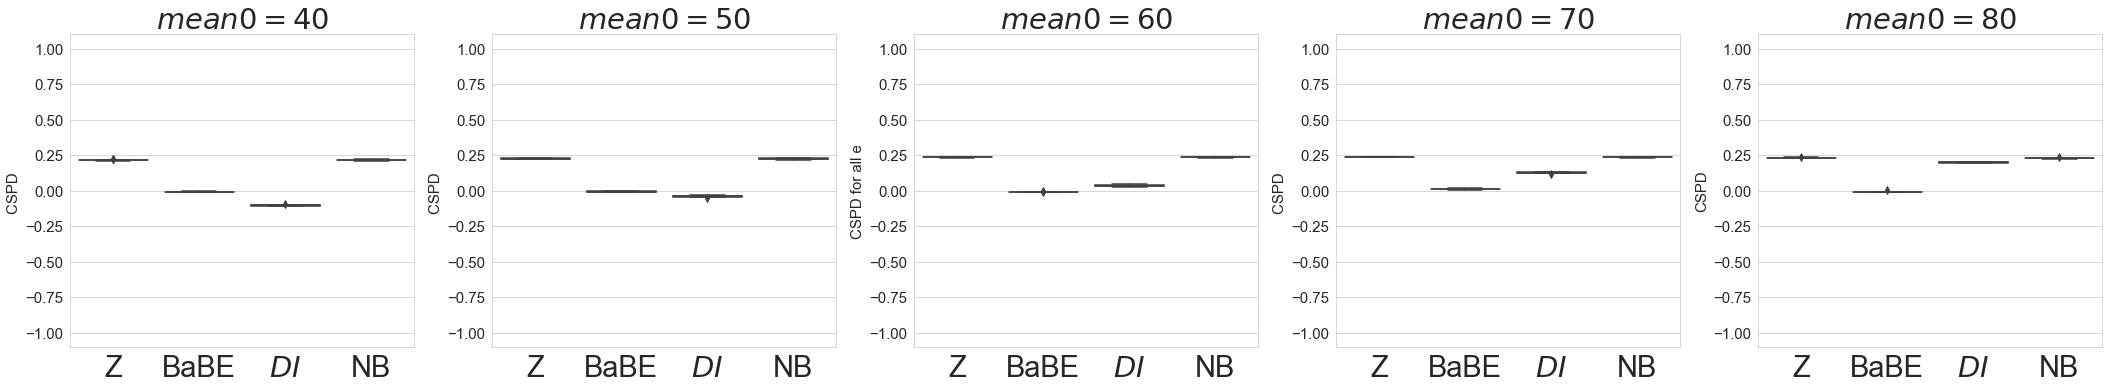

In [41]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=5)

#W dist
sns.boxplot(data =results40[['CSPEY', 'CSPEIBU','CSPEDI08', 'CSPENB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('CSPD ',size=size3,  multialignment='center')
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results50[['CSPEY', 'CSPEIBU','CSPEDI08', 'CSPENB']] ,palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('CSPD ',size=size3,  multialignment='center')
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results60[['CSPEY', 'CSPEIBU','CSPEDI08', 'CSPENB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('CSPD for all e',size=size3,  multialignment='center')
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results70[['CSPEY', 'CSPEIBU','CSPEDI08', 'CSPENB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('CSPD ',size=size3,  multialignment='center')
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results80[['CSPEY', 'CSPEIBU','CSPEDI08', 'CSPENB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('CSPD',size=size3,  multialignment='center')
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)


sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.savefig('Results_experiment1/1_cspe.pdf')

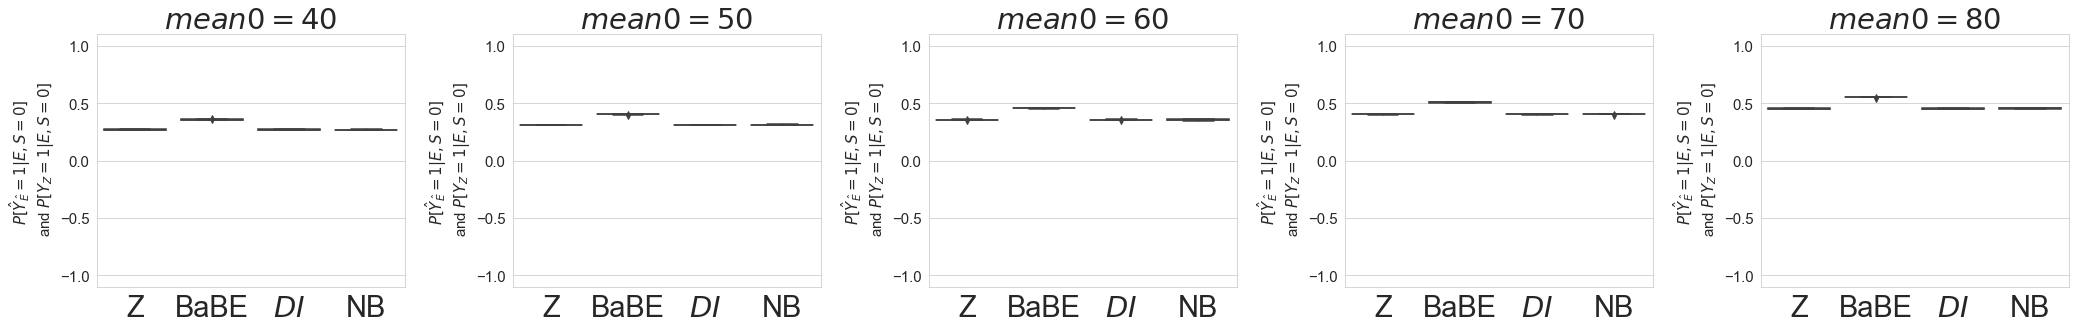

In [42]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=8)

#W dist
sns.boxplot(data =results40[['CSPE0Y', 'CSPE0IBU','CSPE0DI08', 'CSPE0NB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E, S=0]$ \n and $P[Y_Z=1|E, S=0]$',size=size3,  multialignment='center')
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results50[['CSPE0Y', 'CSPE0IBU','CSPE0DI08', 'CSPE0NB'] ],palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E, S=0]$ \n and $P[Y_Z=1|E, S=0]$',size=size3,  multialignment='center')
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results60[['CSPE0Y', 'CSPE0IBU','CSPE0DI08', 'CSPE0NB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E, S=0]$ \n and $P[Y_Z=1|E, S=0]$',size=size3,  multialignment='center')
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results70[['CSPE0Y', 'CSPE0IBU','CSPE0DI08', 'CSPE0NB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E, S=0]$ \n and $P[Y_Z=1|E, S=0]$',size=size3,  multialignment='center')
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results80[['CSPE0Y', 'CSPE0IBU','CSPE0DI08', 'CSPE0NB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E, S=0]$ \n and $P[Y_Z=1|E, S=0]$',size=size3,  multialignment='center')
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)


sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.savefig('Results_experiment1/1_cspe0.pdf')

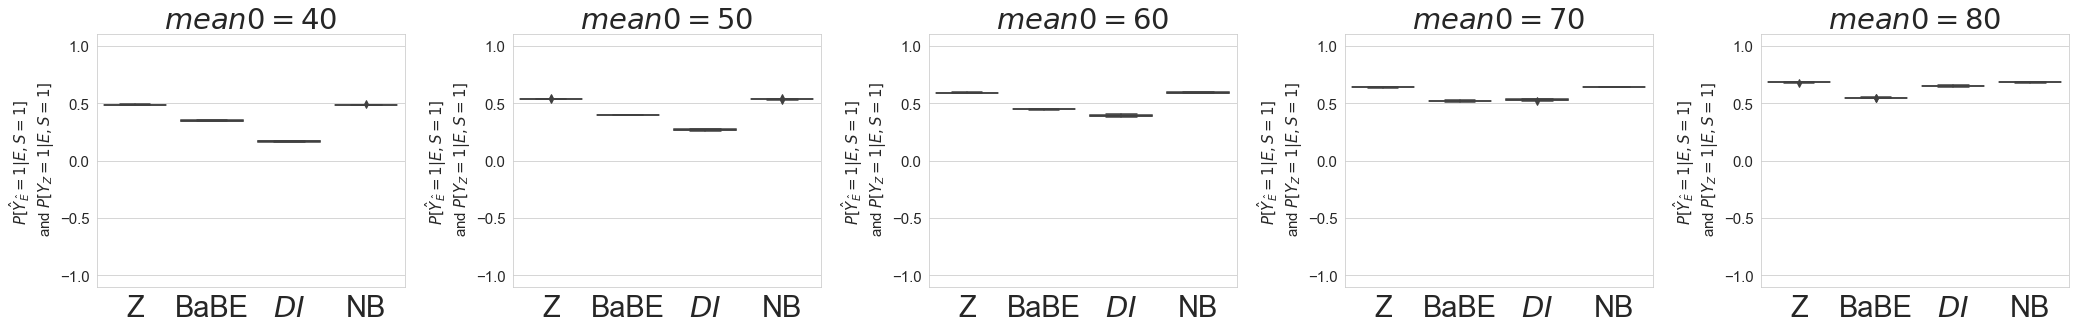

In [43]:

fig, (ax1) = plt.subplots(1, 5,  figsize=(30,6))

fig.tight_layout(pad=8)

#W dist
sns.boxplot(data =results40[['CSPE1Y', 'CSPE1IBU','CSPE1DI08', 'CSPE1NB']] ,palette="GnBu", ax=ax1[0] )
ax1[0].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E, S=1]$ \n and $P[Y_Z=1|E, S=1]$',size=size3,  multialignment='center')
ax1[0].set_title(r'$\mathit{mean0=40}$', size=size1)
ax1[0].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[0].set_ylim(-1.1,1.1)
ax1[0].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results50[['CSPE1Y', 'CSPE1IBU','CSPE1DI08', 'CSPE1NB'] ],palette="GnBu", ax=ax1[1] )
ax1[1].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E, S=1]$ \n and $P[Y_Z=1|E, S=1]$',size=size3,  multialignment='center')
ax1[1].set_title(r'$\mathit{mean0=50}$', size=size1)
ax1[1].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[1].set_ylim(-1.1,1.1)
ax1[1].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results60[['CSPE1Y', 'CSPE1IBU','CSPE1DI08', 'CSPE1NB']] ,palette="GnBu", ax=ax1[2] )
ax1[2].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E, S=1]$ \n and $P[Y_Z=1|E, S=1]$',size=size3,  multialignment='center')
ax1[2].set_title(r'$\mathit{mean0=60}$', size=size1)
ax1[2].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[2].set_ylim(-1.1,1.1)
ax1[2].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results70[['CSPE1Y', 'CSPE1IBU','CSPE1DI08', 'CSPE1NB']] ,palette="GnBu", ax=ax1[3] )
ax1[3].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E, S=1]$ \n and $P[Y_Z=1|E, S=1]$',size=size3,  multialignment='center')
ax1[3].set_title(r'$\mathit{mean0=70}$', size=size1)
ax1[3].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[3].set_ylim(-1.1,1.1)
ax1[3].tick_params(axis='y', which='major', labelsize=size2)


sns.boxplot(data =results80[['CSPE1Y', 'CSPE1IBU','CSPE1DI08', 'CSPE1NB']] ,palette="GnBu", ax=ax1[4] )
ax1[4].set_ylabel('$P[\hat{Y}_{\hat{E}}=1|E, S=1]$ \n and $P[Y_Z=1|E, S=1]$',size=size3,  multialignment='center')
ax1[4].set_title(r'$\mathit{mean0=80}$', size=size1)
ax1[4].set_xticklabels(['Z','BaBE', r'$DI$', 'NB'], size=size1)
ax1[4].set_ylim(-1.1,1.1)
ax1[4].tick_params(axis='y', which='major', labelsize=size2)


sns.set_style('whitegrid')
# sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.savefig('Results_experiment1/1_cspe1.pdf')